## PyRCA: simulation

In [1]:
%reload_ext autoreload
%autoreload 2


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams["font.size"] = 7
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['axes.linewidth'] = 1.0
plt.rcParams['axes.grid'] = True


In [3]:
import sys
sys.path.append('../')


## Massive Experiments

In [4]:
import sys
sys.path.append('../PyRCA')


In [5]:
num_trials = 5
anomaly_types = [0, 1]
func_types = ["identity"]#"square", "sin", "tanh"]
noise_types = ["normal", "exponential", "uniform", "laplace"]
weight_generators = ["normal", "uniform"]
# _VALID_FUNC = ["identity", "square", "sin", "tanh"]
# _VALID_NOISE = ["normal", "exponential", "uniform", "laplace"]
# _VALID_WEIGHT = ["normal", "uniform"]
data_scale_params = [
    {"num_node": 50, "num_edge": 100, "num_normal_samples": 160, "num_abnormal_samples": 20},
    {"num_node": 50, "num_edge": 200, "num_normal_samples": 160, "num_abnormal_samples": 20},
    {"num_node": 100, "num_edge": 500, "num_normal_samples": 160, "num_abnormal_samples": 20},
    {"num_node": 100, "num_edge": 750, "num_normal_samples": 160, "num_abnormal_samples": 20},
    # {"num_node": 500, "num_edge": 5000, "num_normal_samples": 160, "num_abnormal_samples": 20},
    # {"num_node": 50, "num_edge": 100, "num_normal_samples": 480, "num_abnormal_samples": 60},
    # {"num_node": 50, "num_edge": 100, "num_normal_samples": 60, "num_abnormal_samples": 60},
    # {"num_node": 100, "num_edge": 500, "num_normal_samples": 160, "num_abnormal_samples": 20},
    # {"num_node": 100, "num_edge": 500, "num_normal_samples": 480, "num_abnormal_samples": 60},
    # {"num_node": 200, "num_edge": 1000, "num_normal_samples": 160, "num_abnormal_samples": 20},
    # {"num_node": 500, "num_edge": 5000, "num_normal_samples": 160, "num_abnormal_samples": 20},
    # {"num_node": 200, "num_edge": 1000, "num_normal_samples": 480, "num_abnormal_samples": 60},
    # {"num_node": 1200, "num_edge": 6000, "num_normal_samples": 160, "num_abnormal_samples": 80},
    # {"num_node": 300, "num_edge": 600, "num_normal_samples": 160, "num_abnormal_samples": 20},
    # {"num_node": 50, "num_edge": 100, "num_normal_samples": 20, "num_abnormal_samples": 20},
    # {"num_node": 50, "num_edge": 100, "num_normal_samples": 60, "num_abnormal_samples": 60},
    # {"num_node": 1200, "num_edge": 6000, "num_normal_samples": 60, "num_abnormal_samples": 60},
]

# dataset = generate_datasets_from_param_sets(anomaly_types, data_scale_params, func_types, noise_types, weight_generators, num_trials)


### Feature Reduction Evaluation

In [6]:
from simulation.feature_reduction import sweep_load_and_reduction


In [239]:
fl_results = sum([
    sweep_load_and_reduction(anomaly_types, data_scale_params, func_types, noise_types, weight_generators, [trial_no], n_jobs=-1) for trial_no in range(1, num_trials+1)
], [])


Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: normal, weight_generator:normal, trian_no 1...
Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: normal, weight_generator:uniform, trian_no 1...
Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: exponential, weight_generator:normal, trian_no 1...
Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: uniform, weight_generator:normal, trian_no 1...
Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_t

In [452]:
fl_ideal_results = sweep_load_and_reduction(anomaly_types, data_scale_params, func_types, noise_types, weight_generators, list(range(1, num_trials+1)), methods=["Ideal"], n_jobs=-1)


Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: normal, weight_generator:normal, trian_no 1...
Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: normal, weight_generator:normal, trian_no 1...
Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: normal, weight_generator:normal, trian_no 1...
Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: normal, weight_generator:normal, trian_no 1...
Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: no

Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: normal, weight_generator:normal, trian_no 2...
Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: normal, weight_generator:normal, trian_no 2...
Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: normal, weight_generator:normal, trian_no 2...
Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: normal, weight_generator:normal, trian_no 2...
Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: no

In [458]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    fl_df = pd.DataFrame(fl_results).groupby(["anomaly_type", "num_node", "num_edge", "func_type", "noise_type", "weight_generator", "num_normal_samples", "num_abnormal_samples", "reduction_method"], as_index=True).mean().sort_index()
    display(fl_df)
    fl_df.reset_index().to_csv("materials/pyrca_feature_reduction_simulation_results.csv")


num_remained  \
anomaly_type num_node num_edge func_type noise_type  weight_generator num_normal_samples num_abnormal_samples reduction_method                 
0            50       100      identity  exponential normal           160                20                   BIRCH                     33.8   
                                                                                                              FluxInfer-AD              32.8   
                                                                                                              HDBS-R                     6.8   
                                                                                                              HDBS-SBD                   6.2   
                                                                                                              K-S test                  16.2   
                                                                                                              MetricSifter              16.8   
                                                                                                              NSigma                    37.0   
                                                                                                              None                      50.0   
                                                     uniform          160                20                   BIRCH                     30.2   
                                                                                                              FluxInfer-AD              27.2   
                                                                                                              HDBS-R                     7.4   
                                                                                                              HDBS-SBD                   5.0   
                                                                                                              K-S test                  11.2   
                                                                                                              MetricSifter              11.4   
                                                                                                              NSigma                    35.6   
                                                                                                              None                      50.0   
                                         laplace     normal           160                20                   BIRCH                     36.0   
                                                                                                              FluxInfer-AD              27.6   
                                                                                                              HDBS-R                     6.6   
                                                                                                              HDBS-SBD                   6.4   
                                                                                                              K-S test                  18.0   
                                                                                                              MetricSifter              15.8   
                                                                                                              NSigma                    37.2   
                                                                                                              None                      50.0   
                                                     uniform          160                20                   BIRCH                     38.8   
                                                                                                              FluxInfer-AD              32.0   
                                                                                                

In [281]:
fl_raw_df = pd.read_csv("materials/pyrca_feature_reduction_simulation_results.csv")
fl_df = fl_raw_df.groupby(["anomaly_type", "num_node", "num_edge", "func_type", "noise_type", "weight_generator", "num_normal_samples", "num_abnormal_samples", "reduction_method"], as_index=True).mean().sort_index()


In [282]:
fl_raw_df[fl_raw_df["reduction_method"] == "MetricSifter"]["bacc"].mean()


0.9655387387808569

In [12]:
import seaborn as sns

sns.set_style("ticks")
sns.set_context("paper", font_scale=1.3)
sns.set_palette("tab10", 8, 0.5)


In [25]:

def wrap(label):
    match label.get_text():
        case "FluxInfer-AD":
            return "FluxInfer-\nAD"
        case "HDBSCAN-SBD":
            return "HDBS-SBD"
        case "HDBSCAN-PEARSON":
            return "HDBS-R"
    return label

def map_dataset(row: pd.Series):
    match row["num_node"], row["num_edge"]:
        case (50, 100):
            return '$\\mathcal{D}_{Sim}^{50\\,100}$'
        case (50, 200):
            return '$\\mathcal{D}_{Sim}^{50\\,200}$'
        case (100, 500):
            return '$\\mathcal{D}_{Sim}^{100\\,500}$'
        case (100, 750):
            return '$\\mathcal{D}_{Sim}^{100\\,750}$'
        case _:
            assert False, f"Unknown dataset {row['num_node']} {row['num_edge']}"

def style_boxplot(sns_fig, hatchs):
    # see https://gist.github.com/mourisl/30d9a8e130f80bde382f95b8ccb3f59d
    for i, (box, hatch) in enumerate(zip([p for p in sns_fig.patches if not p.get_label()], hatchs)):
        color = box.get_facecolor()
        box.set_edgecolor(color)
        box.set_facecolor((0, 0, 0, 0))
        box.set_hatch(hatch)
        # iterate over whiskers and median lines
        for j in range(5*i,5*(i+1)):
            sns_fig.lines[j].set_color(color)

from itertools import cycle

def plot_perf_of_reduction(
    df: pd.DataFrame,
    hue: str,
    evaluation_metric: str,
    legend_title: str,
    ylabel_title: str,
    num_of_hue: int,
    anomaly_types: list[int] = [0, 1, 2],
):
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    box_df = df.reset_index()
    box_df = box_df[box_df["anomaly_type"].isin(anomaly_types)]
    box_df["node/edge"] = box_df["num_node"].astype(str) + "/" + box_df["num_edge"].astype(str)
    box_df["dataset"] = box_df.apply(lambda x: map_dataset(x), axis=1)

    box = sns.boxplot(
        data=box_df, x="reduction_method", y=evaluation_metric, hue=hue, showfliers=False,
        order=["NSigma", "BIRCH", "K-S test", "FluxInfer-AD", "HDBS-SBD", "HDBS-R", "MetricSifter"],
        ax=ax,
    )

    hatchs = ["++++","////","\\\\\\\\","xxxx", "oooo", "----", "....", "***"][:num_of_hue]
    for i, (patch, hatch) in enumerate(zip(
        [p for p in box.patches if not p.get_label()],
        cycle(hatchs),
    )):
        patch.set_hatch(hatch)
        fc = patch.get_facecolor()
        patch.set_edgecolor(fc)
        patch.set_facecolor('none')
        for j in range(5*i,5*(i+1)):
            box.lines[j].set_color(fc)


    ax.set_xlabel("Reduction Method", fontsize=12)
    ax.set_ylabel(ylabel_title, fontsize=12)
    ax.set_ylim(0, 1)
    ax.set_xticklabels([wrap(l) for l in ax.get_xticklabels()], rotation=0, fontsize=10)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
    ax.legend(title=legend_title)

    # https://stackoverflow.com/questions/72656861/how-to-add-hatches-to-boxplots-with-sns-boxplot-or-sns-catplot
    l = box.legend()
    for lp, hatch in zip(l.get_patches(), hatchs):
        lp.set_hatch(hatch)
        fc = lp.get_facecolor()
        lp.set_edgecolor(fc)
        lp.set_facecolor('none')

    sns.move_legend(
        ax, "lower center",
        bbox_to_anchor=(.5, 1), ncol=num_of_hue, title=legend_title, frameon=False, fontsize=10, title_fontsize=12
    )

    fig.savefig(
        f"materials/pyrca_feature_reduction_simulation_{evaluation_metric}_by_{hue}_anomaly-{'-'.join([str(i) for i in anomaly_types])}.pdf",
        format="pdf", bbox_inches="tight",
    )


def plot_time_of_reduction(
    df: pd.DataFrame,
    hue: str,
    evaluation_metric: str,
    legend_title: str,
    ylabel_title: str,
    num_of_hue: int,
    anomaly_types: list[int] = [0, 1, 2],
):
    fig, (ax, zoomed_ax) = plt.subplots(2, 1, figsize=(7, 7), gridspec_kw={'height_ratios': [1.5, 1]})
    box_df = df.reset_index()
    box_df = box_df[box_df["anomaly_type"].isin(anomaly_types)]
    box_df["node/edge"] = box_df["num_node"].astype(str) + "/" + box_df["num_edge"].astype(str)
    box_df["dataset"] = box_df.apply(lambda x: map_dataset(x), axis=1)

    bar = sns.barplot(
        data=box_df, x="reduction_method", y=evaluation_metric, hue=hue,
        order=["NSigma", "BIRCH", "K-S test", "FluxInfer-AD", "HDBS-SBD", "HDBS-R", "MetricSifter"],
        alpha=1, color="none", fill=None,
        ax=ax,
    )

    hatchs = ["++++","////","\\\\\\\\","xxxx", "oooo", "----", "....", "***"][:num_of_hue]
    for bars, hatch, color in zip(bar.containers, cycle(hatchs), cycle(sns.color_palette()[:num_of_hue])):
        for bar in bars:
            bar.set_hatch(hatch)
            bar.set_edgecolor(color)

    ax.set_xlabel("Reduction Method", fontsize=12)
    ax.set_ylabel(ylabel_title, fontsize=12)
    ax.set_ylim(0, 6)
    ax.set_xticklabels([wrap(l) for l in ax.get_xticklabels()], rotation=0, fontsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.legend(title=legend_title)

    sns.move_legend(
        ax, "lower center",
        bbox_to_anchor=(.5, 1), ncol=num_of_hue, title=legend_title, frameon=False, fontsize=10, title_fontsize=12
    )

    with sns.plotting_context(context="paper", font_scale=0.8):
        max_zoomed_value = 0.4
        zoomed_df = box_df[box_df.loc[:, evaluation_metric] < max_zoomed_value]
        bar2 = sns.barplot(
            data=zoomed_df, x="reduction_method", y=evaluation_metric, hue=hue,
            order=["NSigma", "BIRCH", "K-S test", "FluxInfer-AD", "HDBS-SBD", "HDBS-R", "MetricSifter"],
            alpha=1, color="none", fill=None,
            ax=zoomed_ax,
        )
        zoomed_ax.set_title(f"Zoomed-in View for T(s) < {max_zoomed_value}", fontsize=11)
        zoomed_ax.set_xlabel("Reduction Method", fontsize=9)
        zoomed_ax.set_ylabel(ylabel_title, fontsize=9)
        zoomed_ax.set_xticklabels([wrap(l) for l in zoomed_ax.get_xticklabels()], rotation=0, fontsize=9)
        zoomed_ax.tick_params(axis='y', labelsize=9)
        zoomed_ax.set_ylim(0, max_zoomed_value)
        zoomed_ax.get_legend().remove()

        for patch, hatch, color in zip(bar2.patches, cycle(hatchs), cycle(sns.color_palette())):
            patch.set_hatch(hatch)
            patch.set_edgecolor(color)

    fig.tight_layout()
    fig.savefig(
        f"materials/pyrca_feature_reduction_simulation_{evaluation_metric}_by_{hue}_anomaly-{'-'.join([str(i) for i in anomaly_types])}.pdf",
        format="pdf", bbox_inches="tight",
    )


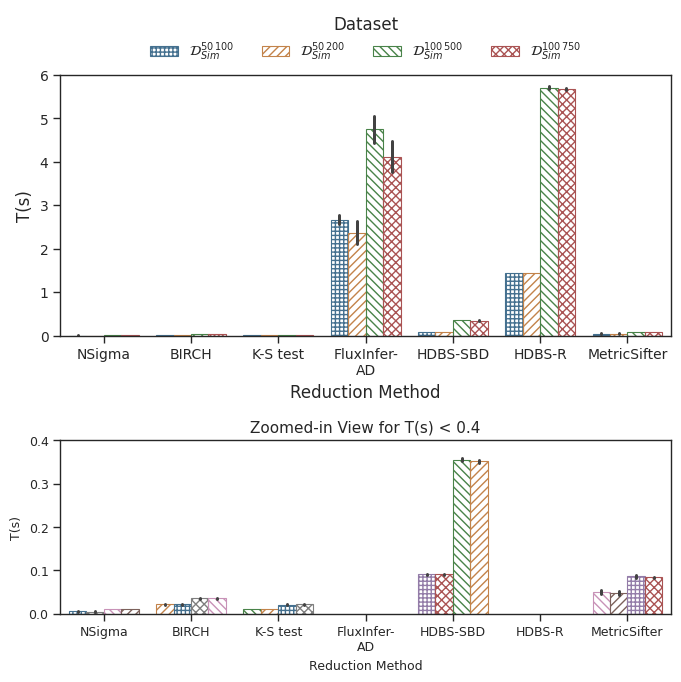

In [385]:
plot_time_of_reduction(
    fl_df.reset_index(),
    hue="dataset",
    evaluation_metric="elapsed_time_tsdr",
    legend_title="Dataset",
    ylabel_title="T(s)",
    num_of_hue=4,
)


/tmp/ipykernel_2086259/172620733.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)


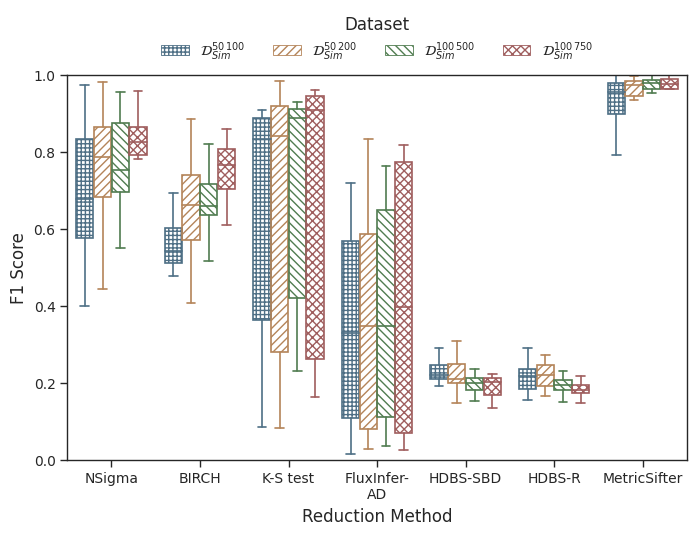

In [299]:
plot_perf_of_reduction(
    fl_df.reset_index(),
    hue="dataset",
    evaluation_metric="f1_score",
    legend_title="Dataset",
    ylabel_title="F1 Score",
    num_of_hue=4,
)


/tmp/ipykernel_2086259/172620733.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)


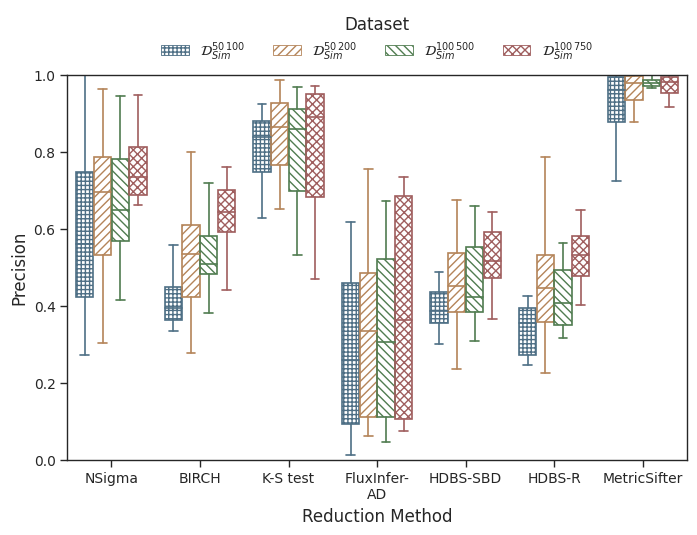

In [300]:
plot_perf_of_reduction(
    fl_df.reset_index(),
    hue="dataset",
    evaluation_metric="precision",
    legend_title="Dataset",
    ylabel_title="Precision",
    num_of_hue=4,
)


/tmp/ipykernel_2086259/172620733.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)


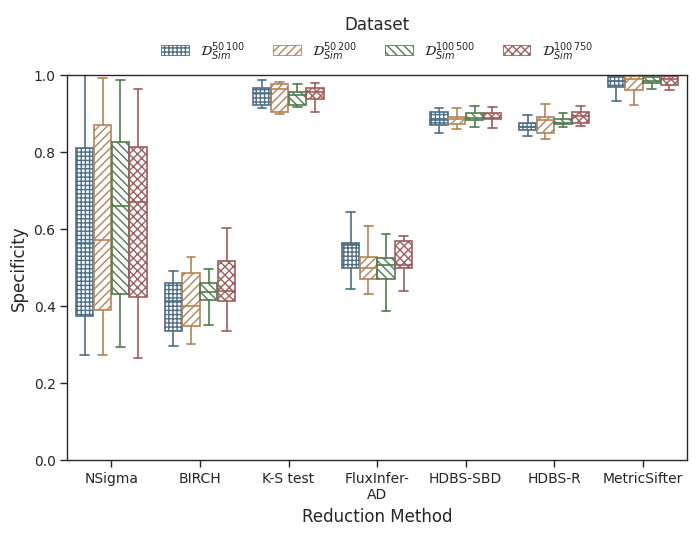

In [301]:
plot_perf_of_reduction(
    fl_df.reset_index(),
    hue="dataset",
    evaluation_metric="specificity",
    legend_title="Dataset",
    ylabel_title="Specificity",
    num_of_hue=4,
)


/tmp/ipykernel_2086259/172620733.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)


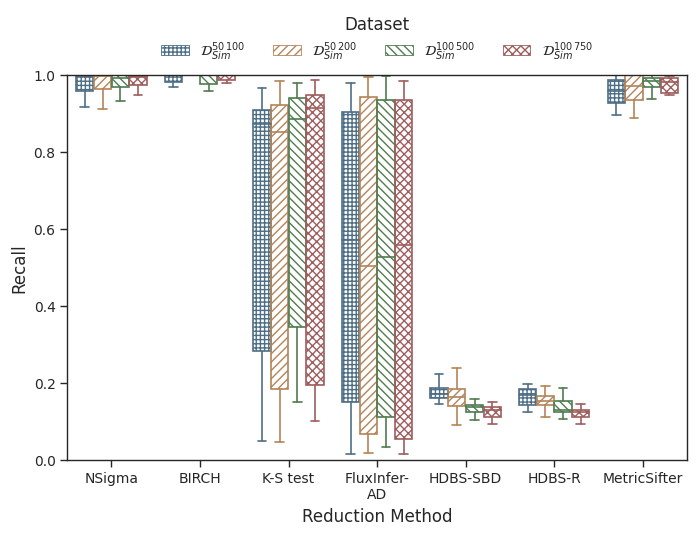

In [302]:
plot_perf_of_reduction(
    fl_df.reset_index(),
    hue="dataset",
    evaluation_metric="recall",
    legend_title="Dataset",
    ylabel_title="Recall",
    num_of_hue=4,
)


/tmp/ipykernel_2086259/172620733.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)


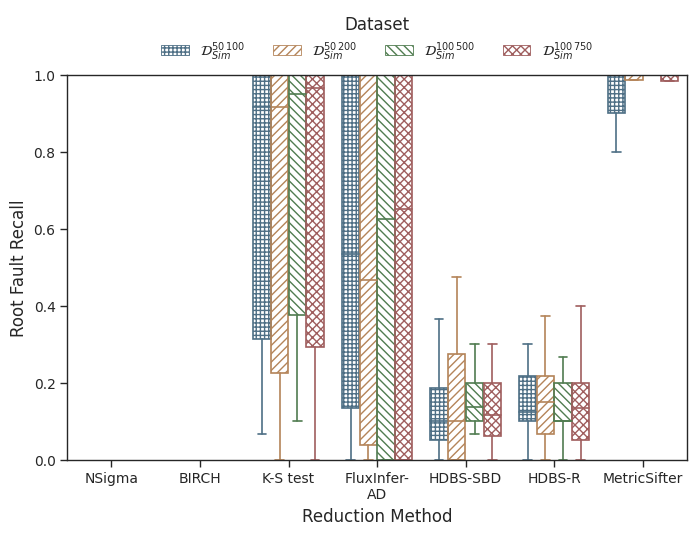

In [303]:
plot_perf_of_reduction(
    fl_df.reset_index(),
    hue="dataset",
    evaluation_metric="root_cause_recall",
    legend_title="Dataset",
    ylabel_title="Root Fault Recall",
    num_of_hue=4,
)


/tmp/ipykernel_2086259/172620733.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)


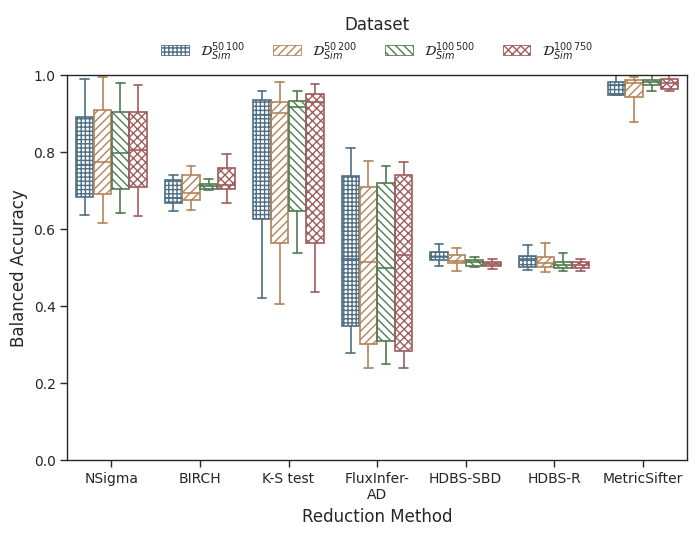

In [304]:
plot_perf_of_reduction(
    fl_df.reset_index(),
    hue="dataset",
    evaluation_metric="bacc",
    legend_title="Dataset",
    ylabel_title="Balanced Accuracy",
    num_of_hue=4,
)


/tmp/ipykernel_1518081/1799406686.py:75: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)


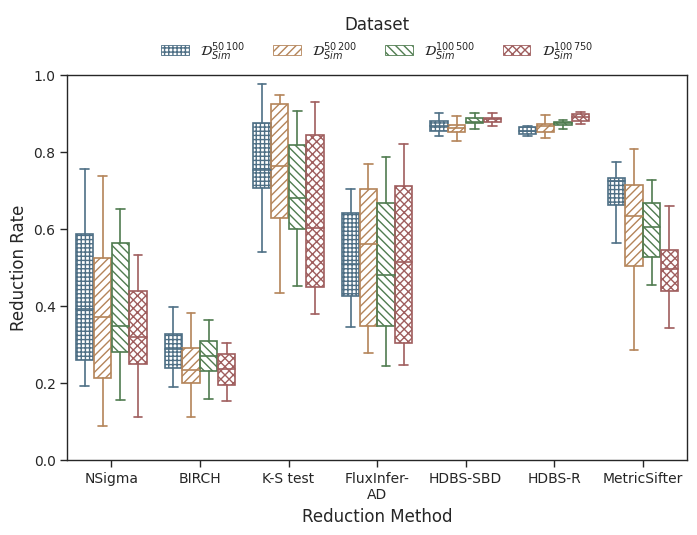

In [283]:
plot_perf_of_reduction(
    fl_df.reset_index(),
    hue="dataset",
    evaluation_metric="reduction_rate",
    legend_title="Dataset",
    ylabel_title="Reduction Rate",
    num_of_hue=4,
)


/tmp/ipykernel_2086259/172620733.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)


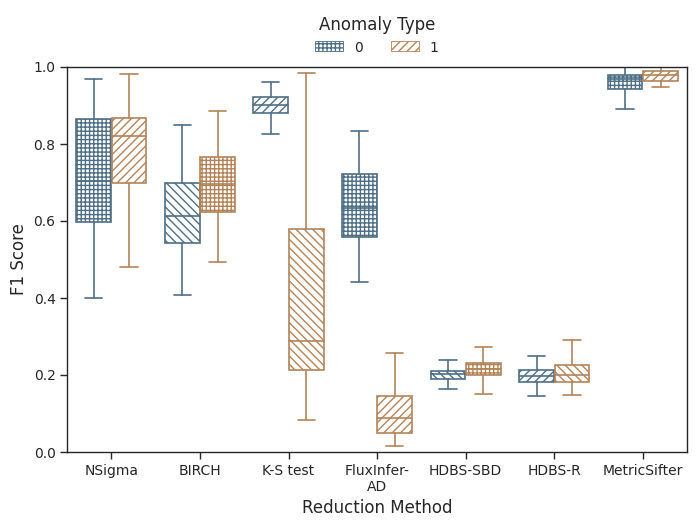

In [305]:
plot_perf_of_reduction(
    fl_df.reset_index(),
    hue="anomaly_type",
    evaluation_metric="f1_score",
    legend_title="Anomaly Type",
    ylabel_title="F1 Score",
    num_of_hue=3,
)


/tmp/ipykernel_2086259/172620733.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)


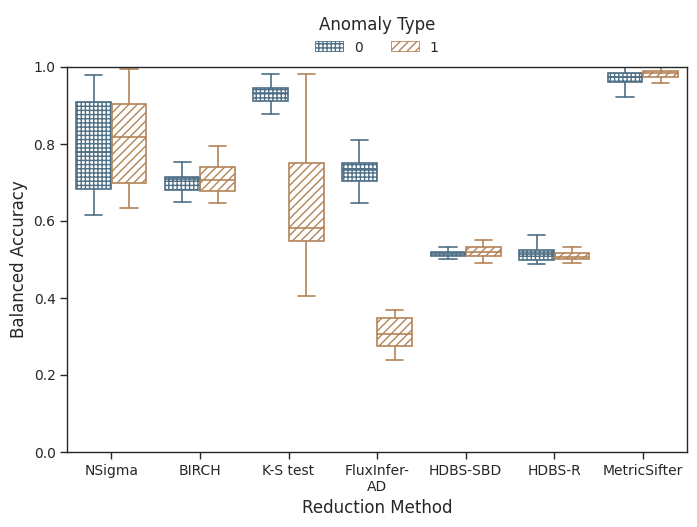

In [307]:
plot_perf_of_reduction(
    fl_df.reset_index(),
    hue="anomaly_type",
    evaluation_metric="bacc",
    legend_title="Anomaly Type",
    ylabel_title="Balanced Accuracy",
    num_of_hue=2,
)


/tmp/ipykernel_2086259/172620733.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)


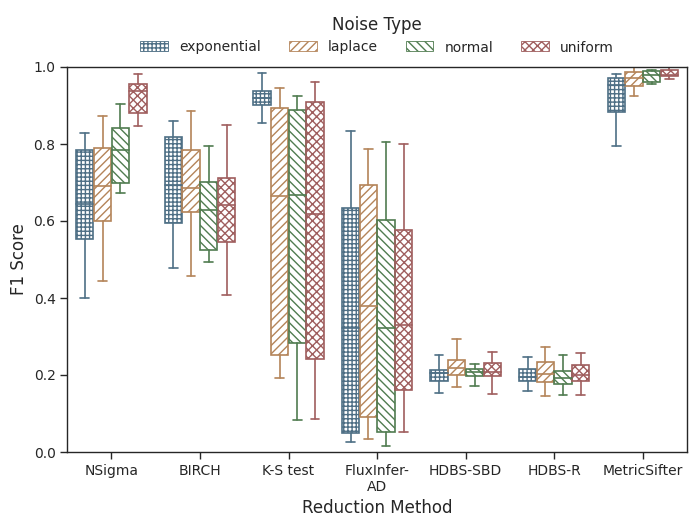

In [308]:
plot_perf_of_reduction(
    fl_df.reset_index(),
    hue="noise_type",
    evaluation_metric="f1_score",
    legend_title="Noise Type",
    ylabel_title="F1 Score",
    num_of_hue=4,
)


/tmp/ipykernel_2086259/172620733.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)


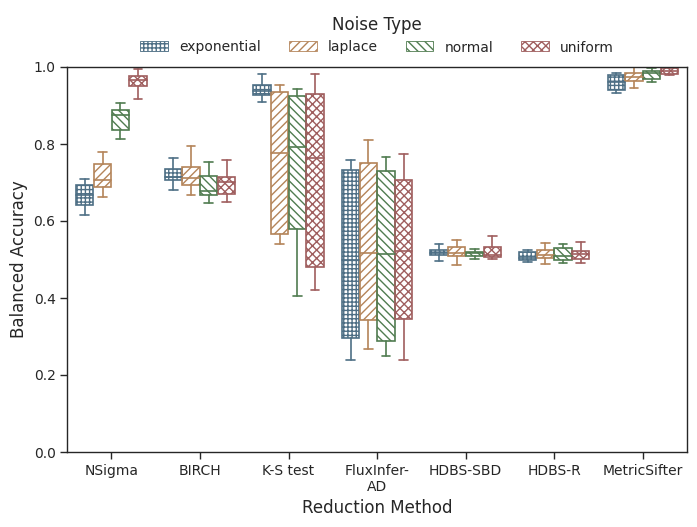

In [309]:
plot_perf_of_reduction(
    fl_df.reset_index(),
    hue="noise_type",
    evaluation_metric="bacc",
    legend_title="Noise Type",
    ylabel_title="Balanced Accuracy",
    num_of_hue=4,
)


/tmp/ipykernel_2086259/172620733.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)


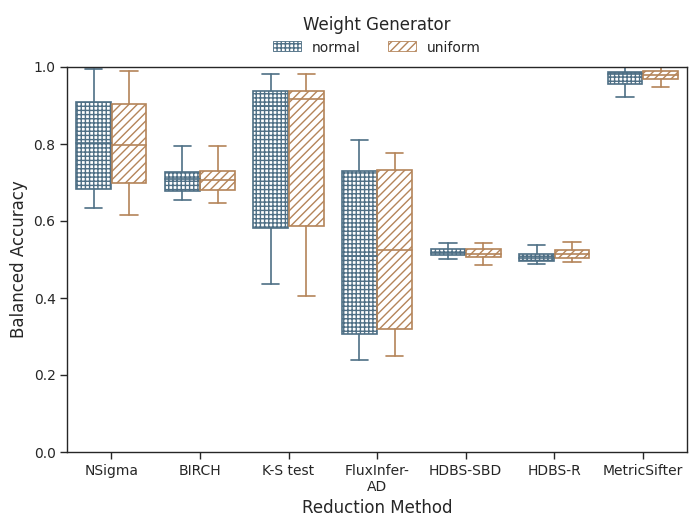

In [310]:
plot_perf_of_reduction(
    fl_df.reset_index(),
    hue="weight_generator",
    evaluation_metric="bacc",
    legend_title="Weight Generator",
    ylabel_title="Balanced Accuracy",
    num_of_hue=2,
)


## Params Sensitivity

In [8]:
from simulation.feature_reduction import sweep_metricsifter_params
from simulation.feature_reduction import logger

logger.setLevel("WARN")

params_sensitivity_results = sweep_metricsifter_params(
    [0.25, 0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00],
    anomaly_types=anomaly_types,
    data_scale_params=data_scale_params,
    func_types=func_types,
    noise_types=noise_types,
    weight_generators=weight_generators,
    trial_nos=list(range(1, num_trials+1)),
    n_jobs=-1,
)


Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: normal, weight_generator:normal, trian_no 4...
Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: normal, weight_generator:normal, trian_no 1...
Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: normal, weight_generator:normal, trian_no 5...
Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: normal, weight_generator:normal, trian_no 3...
Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: no

In [9]:
params_sensitivity_df = pd.DataFrame(params_sensitivity_results)
# .groupby(["anomaly_type", "num_node", "num_edge", "func_type", "noise_type", "weight_generator", "num_normal_samples", "num_abnormal_samples", "reduction_method", "metricsifter_bandwidth"], as_index=True).mean().sort_index()


/home/ubuntu/src/github.com/ai4sre/meltria-analyzer/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


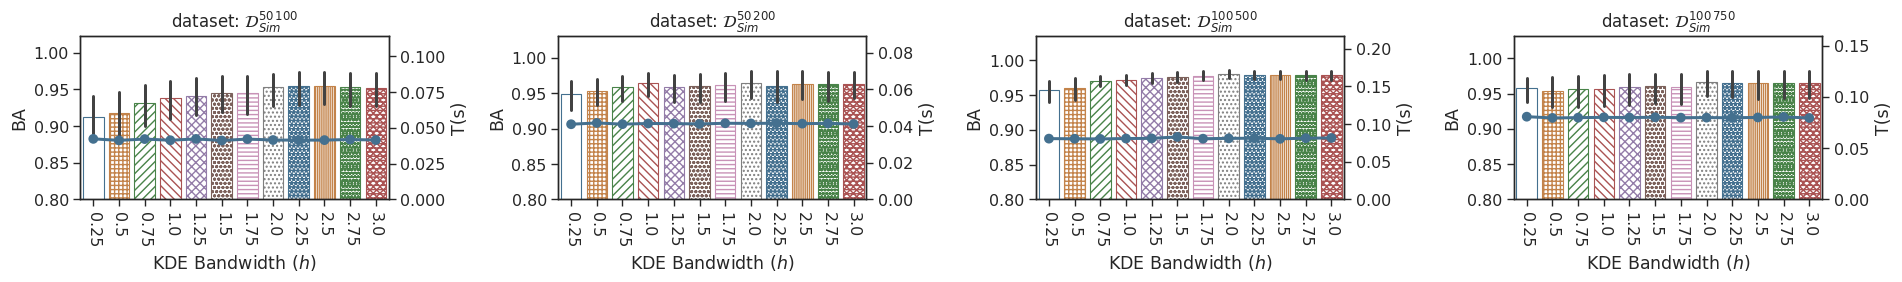

/home/ubuntu/src/github.com/ai4sre/meltria-analyzer/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


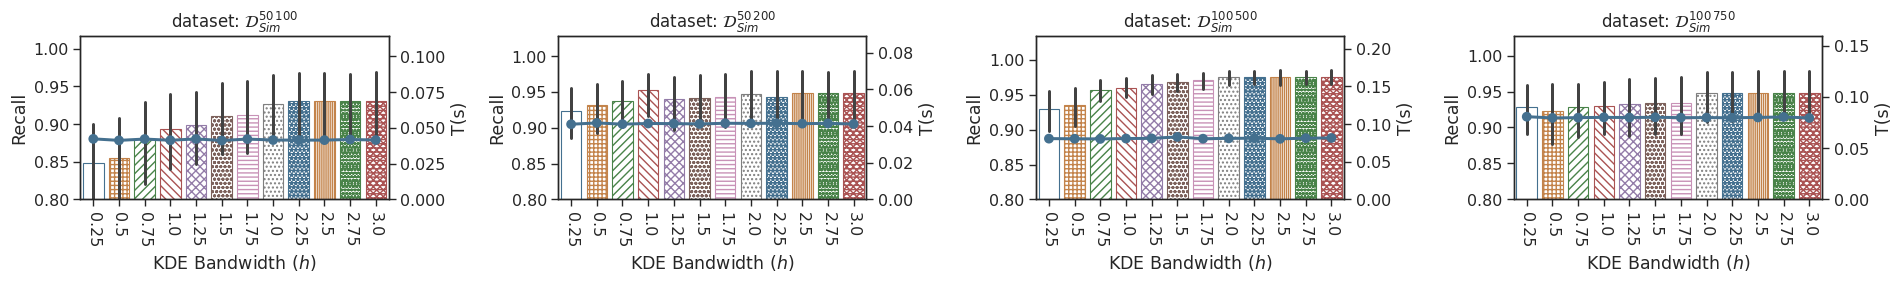

/home/ubuntu/src/github.com/ai4sre/meltria-analyzer/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


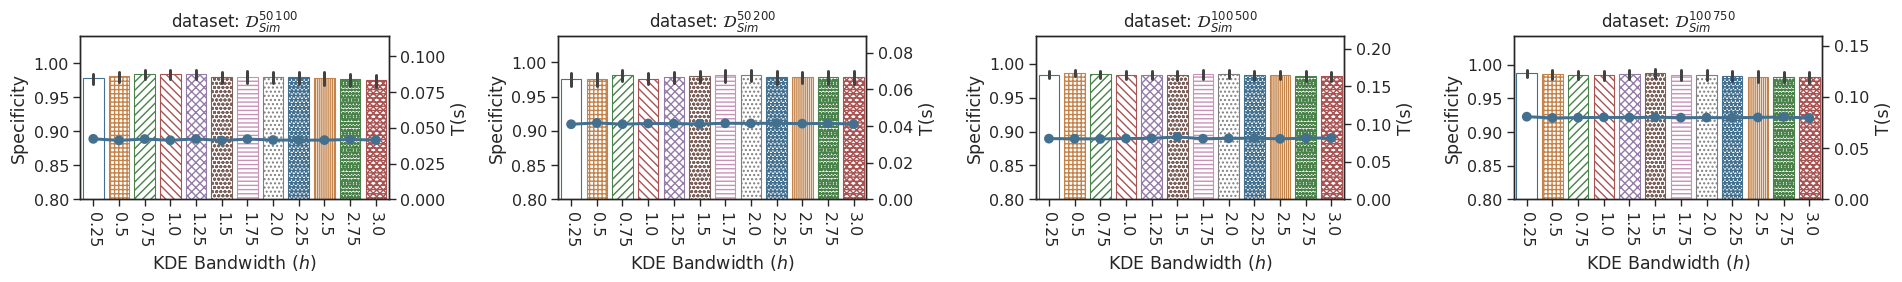

In [13]:
from itertools import cycle
import seaborn as sns

sns.set_style("ticks")
sns.set_context("paper", font_scale=1.3)
sns.set_palette("tab10", 8, 0.5)


def metric_name(var: str):
    match var:
        case "mcc": return "MCC"
        case "bacc": return "BA"
        case "recall": return "Recall"
        case "specificity": return "Specificity"


def style_boxplot(sns_fig, hatchs):
    # see https://gist.github.com/mourisl/30d9a8e130f80bde382f95b8ccb3f59d
    for i, (box, hatch) in enumerate(zip([p for p in sns_fig.patches if not p.get_label()], hatchs)):
        color = box.get_facecolor()
        box.set_edgecolor(color)
        box.set_facecolor((0, 0, 0, 0))
        box.set_hatch(hatch)
        # iterate over whiskers and median lines
        for j in range(5*i,5*(i+1)):
            sns_fig.lines[j].set_color(color)


def facetgrid_two_axes_params(data: pd.DataFrame, x_name: str, xlabel: str, y1_name: str, y2_name: str, ylabel1: str, ylabel2: str, color: str, label: str):
    ax1 = plt.gca()
    # bar = sns.barplot(data, x=x_name, y=y1_name, alpha=.7, ax=ax1, order=order, color="none", fill=None)
    bar = sns.barplot(
        data=data, x=x_name, y=metric,# hue="combination",
        alpha=1, color="none", fill=None,
        # color="none", notch=False, showfliers=False, showcaps=True, showmeans=False,
        ax=ax1,
    )
    # https://stackoverflow.com/questions/76233164/how-to-add-hatches-to-histplot-bars-and-legend
    hatchs = ["","++++","////","\\\\\\\\","xxxx", "oooo", "----", "....", "****", "||||||||", "o-o-o-o-o", "x-x-x-x-x", "+-+-+"]
    # for container, hatch, handle, color in zip(ax.containers, hatchs, ax.get_legend().legend_handles, sns.color_palette()):
    # style_boxplot(box, hatchs)
    for patch, hatch, color in zip(bar.patches, hatchs, cycle(sns.color_palette())):
        patch.set_hatch(hatch)
        patch.set_edgecolor(color)

    ax1.grid(False)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel1)
    ax1.set_xticks(np.arange(len(ax1.get_xticklabels())))
    ax1.set_xticklabels([wrap(l) for l in ax1.get_xticklabels()], rotation=270)
    ax1.autoscale(enable=True, axis='y', tight=False)
    if y1_name == "bacc":
        ax1.set_ylim(ymin=0.8)
    elif y1_name == "recall":
        ax1.set_ylim(ymin=0.8)
    elif y1_name == "specificity":
        ax1.set_ylim(ymin=0.8)
    ax1.ticklabel_format(style="sci", axis="y")

    ax2 = ax1.twinx()
    markers = ["o", "s", "D", "v", "^", "P", "X", "p", "d"]
    sns.pointplot(
        data=data, x=x_name, y=y2_name,
        # order=[], hue_order=[],
        dodge=True,
        markers=markers, linestyles=["-", "--", "-.", ":", "-", "--", "-.", ":", "-", "--", "-.", ":"],
        ax=ax2,
    )

    ax2.grid(False)
    ax2.set_ylabel(ylabel2)
    ax2.set_ylabel("T(s)")
    ymax = data["elapsed_time_tsdr"].max() * 1.5
    ax2.set_ylim(ymin=0, ymax=ymax)
    ax2.ticklabel_format(style="sci", axis="y")


def plot_tsdr_perf_and_time(data_df: pd.DataFrame, metric: str):
    data_df = data_df.reset_index()
    data_df["node/edge"] = data_df["num_node"].astype(str) + "/" + data_df["num_edge"].astype(str)
    data_df["dataset"] = data_df.apply(lambda x: map_dataset(x), axis=1)
    g = sns.FacetGrid(
        data_df, col="dataset",  height=3.0, aspect=1.6,
        # col_order=col_order,
        col_wrap=4,
        margin_titles=True, despine=False,
        sharex=True, sharey=False,
    )
    g.set_titles(row_template='{row_name}', col_template='dataset: {col_name}', size=12)
    g.map_dataframe(
        facetgrid_two_axes_params,
        x_name="metricsifter_bandwidth", xlabel=r'KDE Bandwidth ($h$)',
        y1_name=metric, y2_name="elapsed_time_tsdr", ylabel1=metric_name(metric), ylabel2='T(s)', label="",
    )
    g.tight_layout()

    # ax2.get_legend().remove()
    # sns.move_legend(
    #     ax, "lower center",
    #     bbox_to_anchor=(.5, 1), ncol=3, title="Parameter Set (search, cost, penalty)", frameon=False,
    # )

    g.savefig(f"materials/plot_simulation_tsdr_params_sensitivity_{metric}.pdf", format="pdf", bbox_inches="tight")
    plt.show()


for metric in ["bacc", "recall", "specificity"]:
    plot_tsdr_perf_and_time(params_sensitivity_df, metric)


## Ablation Study

In [414]:
from simulation.feature_reduction import sweep_load_and_reduction
from simulation.feature_reduction import logger

logger.setLevel("WARN")

ablation_results = sweep_load_and_reduction(
    methods=["MetricSifter", "MetricSifter w/o segmentation"],
    data_scale_params=data_scale_params,
    anomaly_types=anomaly_types,
    func_types=func_types,
    noise_types=noise_types,
    weight_generators=weight_generators,
    trial_nos=list(range(1, num_trials+1)),
    n_jobs=-1,
)


Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: normal, weight_generator:normal, trian_no 1...
Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: normal, weight_generator:normal, trian_no 2...
Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: normal, weight_generator:normal, trian_no 4...
Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: normal, weight_generator:normal, trian_no 3...
Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: no

In [425]:
ablation_df = pd.DataFrame(ablation_results)
ablation_df["dataset"] = ablation_df.apply(map_dataset, axis=1)
ablation_display_df = ablation_df.groupby(["dataset", "reduction_method"], as_index=True)[["bacc", "recall", "specificity", "elapsed_time_tsdr"]].mean()
ablation_display_df


bacc  \
dataset                        reduction_method                          
$\mathcal{D}_{Sim}^{100\,500}$ MetricSifter                   0.979748   
                               MetricSifter w/o segmentation  0.941923   
$\mathcal{D}_{Sim}^{100\,750}$ MetricSifter                   0.965151   
                               MetricSifter w/o segmentation  0.949434   
$\mathcal{D}_{Sim}^{50\,100}$  MetricSifter                   0.954176   
                               MetricSifter w/o segmentation  0.928334   
$\mathcal{D}_{Sim}^{50\,200}$  MetricSifter                   0.963275   
                               MetricSifter w/o segmentation  0.944450   

                                                                recall  \
dataset                        reduction_method                          
$\mathcal{D}_{Sim}^{100\,500}$ MetricSifter                   0.975628   
                               MetricSifter w/o segmentation  0.981646   
$\mathcal{D}_{Sim}^{100\,750}$ MetricSifter                   0.948266   
                               MetricSifter w/o segmentation  0.977205   
$\mathcal{D}_{Sim}^{50\,100}$  MetricSifter                   0.930257   
                               MetricSifter w/o segmentation  0.973397   
$\mathcal{D}_{Sim}^{50\,200}$  MetricSifter                   0.948154   
                               MetricSifter w/o segmentation  0.980075   

                                                              specificity  \
dataset                        reduction_method                             
$\mathcal{D}_{Sim}^{100\,500}$ MetricSifter                      0.983868   
                               MetricSifter w/o segmentation     0.902200   
$\mathcal{D}_{Sim}^{100\,750}$ MetricSifter                      0.982036   
                               MetricSifter w/o segmentation     0.921664   
$\mathcal{D}_{Sim}^{50\,100}$  MetricSifter                      0.978096   
                               MetricSifter w/o segmentation     0.883271   
$\mathcal{D}_{Sim}^{50\,200}$  MetricSifter                      0.978396   
                               MetricSifter w/o segmentation     0.908825   

                                                              elapsed_time_tsdr  
dataset                        reduction_method                                  
$\mathcal{D}_{Sim}^{100\,500}$ MetricSifter                            0.084148  
                               MetricSifter w/o segmentation           0.082164  
$\mathcal{D}_{Sim}^{100\,750}$ MetricSifter                            0.084487  
                               MetricSifter w/o segmentation           0.080897  
$\mathcal{D}_{Sim}^{50\,100}$  MetricSifter                            0.043483  
                               MetricSifter w/o segmentation           0.041531  
$\mathcal{D}_{Sim}^{50\,200}$  MetricSifter                            0.042926  
                               MetricSifter w/o segmentation           0.041492

In [432]:
print(
    ablation_display_df.style.format(precision=3).to_latex(hrules=True)
)


\begin{tabular}{llrrrr}
\toprule
 &  & bacc & recall & specificity & elapsed_time_tsdr \\
dataset & reduction_method &  &  &  &  \\
\midrule
\multirow[c]{2}{*}{$\mathcal{D}_{Sim}^{100\,500}$} & MetricSifter & 0.980 & 0.976 & 0.984 & 0.084 \\
 & MetricSifter w/o segmentation & 0.942 & 0.982 & 0.902 & 0.082 \\
\multirow[c]{2}{*}{$\mathcal{D}_{Sim}^{100\,750}$} & MetricSifter & 0.965 & 0.948 & 0.982 & 0.084 \\
 & MetricSifter w/o segmentation & 0.949 & 0.977 & 0.922 & 0.081 \\
\multirow[c]{2}{*}{$\mathcal{D}_{Sim}^{50\,100}$} & MetricSifter & 0.954 & 0.930 & 0.978 & 0.043 \\
 & MetricSifter w/o segmentation & 0.928 & 0.973 & 0.883 & 0.042 \\
\multirow[c]{2}{*}{$\mathcal{D}_{Sim}^{50\,200}$} & MetricSifter & 0.963 & 0.948 & 0.978 & 0.043 \\
 & MetricSifter w/o segmentation & 0.944 & 0.980 & 0.909 & 0.041 \\
\bottomrule
\end{tabular}



## Localization Performance Impact

In [7]:
import sys
sys.path.append('../PyRCA')


In [230]:
import pathlib

localization_dfs = []
for i in range(1, num_trials + 1):
    localization_df = pd.read_pickle(f"./materials/pyrca_feature_reduction_simulation_localization_results_{i}.pkl.gz", compression="gzip")
    localization_df.drop(localization_df[localization_df["localization_method"] == "RCD"].index, inplace=True)
    localization_df.drop(localization_df[localization_df["reduction_method"] == "MetricSifter"].index, inplace=True)
    localization_dfs.append(localization_df)

for i in range(1, num_trials + 1):
    localization_df = pd.read_pickle(f"./materials/pyrca_feature_reduction_simulation_localization_results_{i}_Ideal.pkl.gz", compression="gzip")
    localization_dfs.append(localization_df)

for i in range(1, num_trials + 1):
    localization_df = pd.read_pickle(f"./materials/pyrca_feature_reduction_simulation_localization_results_{i}_MetricSifter.pkl.gz", compression="gzip")
    localization_df.drop(localization_df[localization_df["localization_method"] == "RCD"].index, inplace=True)
    localization_dfs.append(localization_df)

for i in range(1, num_trials + 1):
    localization_df = pd.read_pickle(f"./materials/pyrca_feature_reduction_simulation_localization_results_{i}_rcd.pkl.gz", compression="gzip")
    localization_dfs.append(localization_df)

localization_df = pd.concat(localization_dfs)
localization_df["elapsed_time_sum"] = localization_df["elapsed_time_tsdr"] + localization_df["elapsed_time_loc"]
localization_df


trial_no   k metric      score    hit  num_root_causes  \
34            1   1    X45   0.256301  False                2   
35            1   1    X37  81.361820   True                2   
36            1   2    X25  43.147260  False                2   
37            1   3    X46  39.559394  False                2   
38            1   4    X21  36.181941  False                2   
...         ...  ..    ...        ...    ...              ...   
10278         5  53    X10   0.020000  False                1   
10279         5  54    X55   0.020000  False                1   
10280         5  55    X63   0.020000  False                1   
10281         5  56     X5   0.010000  False                1   
10282         5  57     X3   0.010000  False                1   

      localization_method  elapsed_time_loc  num_node  num_edge  ...  \
34       EpsilonDiagnosis          1.112717        50       100  ...   
35              LiNGAM+HT          2.907223        50       100  ...   
36              LiNGAM+HT          2.907223        50       100  ...   
37              LiNGAM+HT          2.907223        50       100  ...   
38              LiNGAM+HT          2.907223        50       100  ...   
...                   ...               ...       ...       ...  ...   
10278                 RCD          2.167185       100       750  ...   
10279                 RCD          2.167185       100       750  ...   
10280                 RCD          2.167185       100       750  ...   
10281                 RCD          2.167185       100       750  ...   
10282                 RCD          2.167185       100       750  ...   

       num_total  reduction_rate  root_cause_recall  recall precision  \
34            50            0.48                0.5  0.9375  0.576923   
35            50            0.48                0.5  0.9375  0.576923   
36            50            0.48                0.5  0.9375  0.576923   
37            50            0.48                0.5  0.9375  0.576923   
38            50            0.48                0.5  0.9375  0.576923   
...          ...             ...                ...     ...       ...   
10278        100            0.39                1.0  1.0000  1.000000   
10279        100            0.39                1.0  1.0000  1.000000   
10280        100            0.39                1.0  1.0000  1.000000   
10281        100            0.39                1.0  1.0000  1.000000   
10282        100            0.39                1.0  1.0000  1.000000   

      specificity  f1_score      bacc  elapsed_time_tsdr  elapsed_time_sum  
34       0.676471  0.714286  0.806985           0.005291          1.118008  
35       0.676471  0.714286  0.806985           0.005291          2.912514  
36       0.676471  0.714286  0.806985           0.005291          2.912514  
37       0.676471  0.714286  0.806985           0.005291          2.912514  
38       0.676471  0.714286  0.806985           0.005291          2.912514  
...           ...       ...       ...                ...               ...  
10278    1.000000  1.000000  1.000000           0.000004          2.167189  
10279    1.000000  1.000000  1.000000           0.000004          2.167189  
10280    1.000000  1.000000  1.000000           0.000004          2.167189  
10281    1.000000  1.000000  1.000000           0.000004          2.167189  
10282    1.000000  1.000000  1.000000           0.000004          2.167189  

[161675 rows x 28 columns]

In [231]:
def recall(X: pd.Series) -> pd.Series:
    k_values = list(range(1, X["k"].max()+1))
    acc_at_k = {k: .0 for k in k_values}
    num_anomalies: int = X["trial_no"].max()

    for k in k_values:
        for i in range(1, num_anomalies+1):
            x = X.loc[X["trial_no"] == i]
            num_root_causes = x["num_root_causes"].max()  # assume the same for all trials
            num_hit = x.loc[x["k"] <= k]["hit"].sum()
            acc_at_k[k] += num_hit / num_root_causes

        acc_at_k[k] /= num_anomalies

    return pd.Series(acc_at_k)

def avg_recall(X: pd.Series) -> pd.Series:
    max_k = X["k"].max()
    acc = recall(X)
    return pd.Series({k: acc.iloc[:k].sum() / k for k in range(1, max_k + 1)})


from eval.tsdr import get_scores_of_random_selection

def score(row: pd.Series):
    rec = recall(row)
    avgrec = avg_recall(row)
    return pd.Series(
        {
            "ac@2": rec.get(2, .0), "ac@5": rec.get(5, .0), "avg@5": avgrec.get(5, .0), "avg@10": avgrec.get(10, .0),
            "elapsed_time_sum": row["elapsed_time_sum"].mean(), "elapsed_time_tsdr": row["elapsed_time_tsdr"].mean(), "elapsed_time_loc": row["elapsed_time_loc"].mean(),
            "bacc": row["bacc"].mean(), "f1_score": row["f1_score"].mean(), "precision": row["precision"].mean(), "recall": row["recall"].mean(), "specificity": row["specificity"].mean(),
        }
    )

def rs_score(row: pd.Series):
    rs_score = get_scores_of_random_selection(
        num_metrics=row["num_remained"].to_numpy(), num_found_metrics=(row["num_root_causes"]*row["root_cause_recall"]).to_numpy(),
        max_k=row["k"].max(),
    )
    return pd.Series(
        {
            "ac@2": rs_score.get("AC_2", .0), "ac@5": rs_score.get("AC_5", .0), "avg@5": rs_score.get("AVG_5", .0), "avg@10": rs_score.get("AVG_10", .0),
            "elapsed_time_sum": row["elapsed_time_sum"].mean(), "elapsed_time_tsdr": row["elapsed_time_tsdr"].mean(), "elapsed_time_loc": row["elapsed_time_loc"].mean(),
            "bacc": row["bacc"].mean(), "f1_score": row["f1_score"].mean(), "precision": row["precision"].mean(), "recall": row["recall"].mean(), "specificity": row["specificity"].mean(),
        },
    )


In [232]:
from pandarallel import pandarallel
pandarallel.initialize()


INFO: Pandarallel will run on 16 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [233]:
localization_grouped_df = localization_df.groupby(
    ["num_node", "num_edge", "anomaly_type", "func_type", "noise_type", "weight_generator", "localization_method", "reduction_method"],
    as_index=True,
).parallel_apply(score)


In [234]:
localization_grouped_df


ac@2  \
num_node num_edge anomaly_type func_type noise_type  weight_generator localization_method reduction_method         
50       100      0            identity  exponential normal           EpsilonDiagnosis    BIRCH              0.0   
                                                                                          FluxInfer-AD       0.0   
                                                                                          HDBS-SBD           0.0   
                                                                                          Ideal              0.0   
                                                                                          K-S test           0.0   
...                                                                                                          ...   
100      750      1            identity  uniform     uniform          RCD                 Ideal              0.2   
                                                                                          K-S test           NaN   
                                                                                          MetricSifter       0.2   
                                                                                          NSigma             0.2   
                                                                                          None               0.3   

                                                                                                            ac@5  \
num_node num_edge anomaly_type func_type noise_type  weight_generator localization_method reduction_method         
50       100      0            identity  exponential normal           EpsilonDiagnosis    BIRCH              0.0   
                                                                                          FluxInfer-AD       0.0   
                                                                                          HDBS-SBD           0.0   
                                                                                          Ideal              0.0   
                                                                                          K-S test           0.0   
...                                                                                                          ...   
100      750      1            identity  uniform     uniform          RCD                 Ideal              0.4   
                                                                                          K-S test           NaN   
                                                                                          MetricSifter       0.4   
                                                                                          NSigma             0.2   
                                                                                          None               0.5   

                                                                                                            avg@5  \
num_node num_edge anomaly_type func_type noise_type  weight_generator localization_method reduction_method          
50       100      0            identity  exponential normal           EpsilonDiagnosis    BIRCH              0.00   
                                                                                          FluxInfer-AD       0.00   
                                                                                          HDBS-SBD           0.00   
                                                                                          Ideal              0.00   
                                                                                          K-S test           0.00   
...                                                                                                           ...   
100      750      1            identity  uniform     uniform          RCD                 Ideal              0.32   
                                     

In [235]:
localization_rs_grouped_df = localization_df.groupby(
    ["num_node", "num_edge", "anomaly_type", "func_type", "noise_type", "weight_generator", "reduction_method"],
    as_index=True,
).parallel_apply(rs_score)
localization_rs_grouped_df["localization_method"] = "RS"


In [236]:
localization_rs_grouped_df


ac@2  \
num_node num_edge anomaly_type func_type noise_type  weight_generator reduction_method             
50       100      0            identity  exponential normal           BIRCH             0.150469   
                                                                      FluxInfer-AD      0.157323   
                                                                      HDBS-R            0.113335   
                                                                      HDBS-SBD          0.179999   
                                                                      Ideal             0.300626   
...                                                                                          ...   
100      750      1            identity  uniform     uniform          Ideal             0.090900   
                                                                      K-S test          0.133554   
                                                                      MetricSifter      0.091205   
                                                                      NSigma            0.077149   
                                                                      None              0.037413   

                                                                                            ac@5  \
num_node num_edge anomaly_type func_type noise_type  weight_generator reduction_method             
50       100      0            identity  exponential normal           BIRCH             0.328637   
                                                                      FluxInfer-AD      0.343308   
                                                                      HDBS-R            0.217472   
                                                                      HDBS-SBD          0.351351   
                                                                      Ideal             0.582538   
...                                                                                          ...   
100      750      1            identity  uniform     uniform          Ideal             0.204688   
                                                                      K-S test          0.290943   
                                                                      MetricSifter      0.205423   
                                                                      NSigma            0.177064   
                                                                      None              0.090494   

                                                                                           avg@5  \
num_node num_edge anomaly_type func_type noise_type  weight_generator reduction_method             
50       100      0            identity  exponential normal           BIRCH             0.209640   
                                                                      FluxInfer-AD      0.219099   
                                                                      HDBS-R            0.147477   
                                                                      HDBS-SBD          0.236381   
                                                                      Ideal             0.393238   
...                                                                                          ...   
100      750      1            identity  uniform     uniform          Ideal             0.128717   
                                                                      K-S test          0.185836   
                                                                      MetricSifter      0.129166   
                                                                      NSigma            0.110392   
                                                                      None              0.055103   

                                                                                          avg@10  \
num_node num_edge anomaly_type func_type noise_type  weight_generator reduction_method   

In [237]:
localization_joined_df = pd.concat([localization_grouped_df.reset_index(), localization_rs_grouped_df.reset_index()], copy=True)


In [277]:
import matplotlib
import seaborn as sns

LOCALIZATUON_METHODS = [
    "RS",
    "EpsilonDiagnosis",
    "PC+PageRank",
    "PC+HT",
    # "GES+PageRank",
    "LiNGAM+HT",
    "LiNGAM+PageRank",
    # "GES+HT",
    "RCD",
    # "PC+RW-2",
    # "LiNGAM+RW-2",
    # "GES+RW-2",
]

REDUCTION_METHODS = [
    "None", "NSigma", "BIRCH", "K-S test", "FluxInfer-AD", "HDBS-SBD", "HDBS-R", "MetricSifter", "Ideal",
]
# LOC_METHODS = ["RS", "e-Diagnosis", "CG+PageRank", "PC+PageRank", "LiNGAM+PageRank", "PC+HT", "LiNGAM+HT", "RCD"]

sns.set_style("ticks")
sns.set_context("paper", font_scale=1.3)
sns.set_palette("tab10", 8, 0.5)


def wrap_loc(label):
    return "+\n".join(str(label.get_text()).split("+"))

def style_boxplot(sns_fig, hatchs):
    # see https://gist.github.com/mourisl/30d9a8e130f80bde382f95b8ccb3f59d
    for i, (box, hatch, color) in enumerate(zip([p for p in sns_fig.patches if not p.get_label()], hatchs, sns.color_palette(n_colors=len(hatchs)))):
        # color = box.get_facecolor()
        box.set_edgecolor(color)
        box.set_facecolor((0, 0, 0, 0))
        box.set_hatch(hatch)
        # iterate over whiskers and median lines
        for j in range(5*i,5*(i+1)):
            sns_fig.lines[j].set_color(color)

def facetgrid(data: pd.DataFrame, x_name: str, y1_name: str, ylabel1: str, order: list[str], color: str, label: str):
    ax1 = plt.gca()
    sns_fig = sns.boxplot(
        data, x=x_name, y=y1_name, ax=ax1, order=order,
        color="none", notch=False, showfliers=False, showcaps=True,
    )
    ax1.grid(False)
    ax1.set_ylabel(ylabel1)
    ax1.set_xticks(np.arange(len(ax1.get_xticklabels())))
    ax1.set_xticklabels([wrap(l) for l in ax1.get_xticklabels()], rotation=-90)
    ax1.autoscale(enable=True, axis='y', tight=False)
    ax1.ticklabel_format(style="sci", axis="y")

    hatchs = ["///","\\\\\\","xxx", "ooo", "|||", "...", "**", "OO", "/o"]
    style_boxplot(sns_fig, hatchs)

def facetgrid_two_axes(data: pd.DataFrame, x_name: str, y1_name: str, y2_name: str, ylabel1: str, ylabel2: str, order: list[str], color: str, label: str):
    ax1 = plt.gca()
    sns_fig = sns.boxplot(
        data, x=x_name, y=y1_name, ax=ax1, order=order,
        color="none", notch=False, showfliers=False, showcaps=True,
    )
    ax1.grid(False)
    ax1.set_ylabel(ylabel1)
    ax1.set_xticks(np.arange(len(ax1.get_xticklabels())))
    ax1.set_xticklabels([wrap(l) for l in ax1.get_xticklabels()], rotation=-90)
    ax1.autoscale(enable=True, axis='y', tight=False)
    ax1.ticklabel_format(style="sci", axis="y", scilimits=(-2,2))

    hatchs = ["///","\\\\\\","xxx", "ooo", "|||", "...", "**", "OO", "/o"]
    style_boxplot(sns_fig, hatchs)
    # for _bar, hatch in zip(sns_fig.patches, hatchs):
    #     _bar.set_hatch(hatch)
    #     _bar.set_edgecolor(color)

    if data["localization_method"].apply(lambda x: x == "RS").all():
        return

    ax2 = ax1.twinx()
    sns.pointplot(data, x=x_name, y=y2_name, ax=ax2, order=order)
    ax2.grid(False)
    ax2.set_ylabel(ylabel2)
    ax2.autoscale(enable=True, axis='y', tight=False)
    ax2.ticklabel_format(style="sci", axis="y")


def plot_grid(data: pd.DataFrame):
    data["node/edge"] = data["num_node"].astype(str) + "/" + data["num_edge"].astype(str)
    data["dataset"] = data.apply(lambda x: map_dataset(x), axis=1)

    row_order = LOCALIZATUON_METHODS
    col_order = data["dataset"].unique().tolist()
    map_x = "reduction_method"
    map_x_order = REDUCTION_METHODS

    data.loc[data["localization_method"] == "EpsilonDiagnosis", "localization_method"] = r"$\epsilon$-Diagnosis"
    row_order[row_order.index("EpsilonDiagnosis")] = r"$\epsilon$-Diagnosis"

    g = sns.FacetGrid(
        data, col="dataset", row="localization_method", height=2.4, aspect=1.8, col_order=col_order, margin_titles=True, despine=False, row_order=row_order,
        sharex=True, sharey=False,
    )
    g.set_titles(row_template='{row_name}', col_template='{col_var}: {col_name}', size=12)
    g.map_dataframe(
        # facetgrid_two_axes, x_name=map_x, y1_name="avg@5", y2_name="elapsed_time_sum", ylabel1='AVG@5', ylabel2="T(s)", order=map_x_order, label="",
        facetgrid, x_name=map_x, y1_name="avg@5", ylabel1='AVG@5', order=map_x_order, label="",
    )
    g.set_axis_labels(x_var='Reduction Method')
    for ax in g.axes.flat:
        for text in ax.texts:
            if isinstance(text, matplotlib.text.Annotation):
                # adjust the position of the row text
                text.set_x(text.get_position()[0] + 0.25)

    # skip empty plots
    # https://stackoverflow.com/questions/40186545/how-to-avoid-empty-grids-in-seaborn-facetgrid
    for (i,j,k), data in g.facet_data():
        if data.empty:
            ax = g.facet_axis(i, j)
            ax.set_axis_off()

    g.figure.subplots_adjust(wspace=0, hspace=0)
    g.tight_layout()
    g.savefig(f"materials/simulation_reduction_and_localization_grid_dataset_and_localization.pdf", format="pdf", bbox_inches="tight")


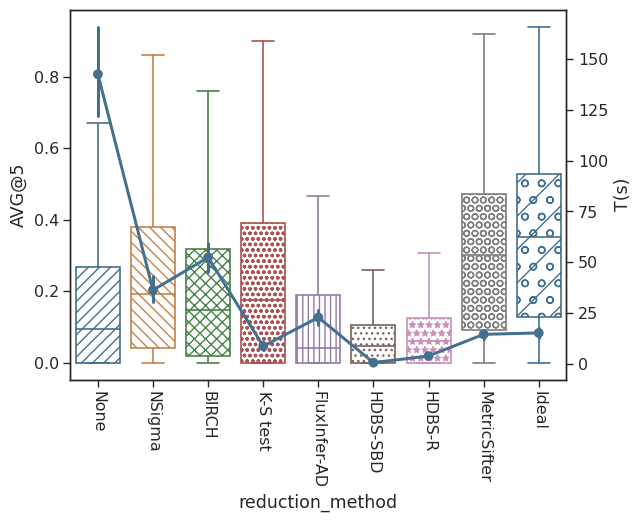

In [278]:
facetgrid_two_axes(data=localization_joined_df.fillna(0).reset_index(), x_name="reduction_method", y1_name="avg@5", y2_name="elapsed_time_sum", ylabel1='AVG@5', ylabel2="T(s)", order=REDUCTION_METHODS, color="", label="")


/home/ubuntu/src/github.com/ai4sre/meltria-analyzer/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


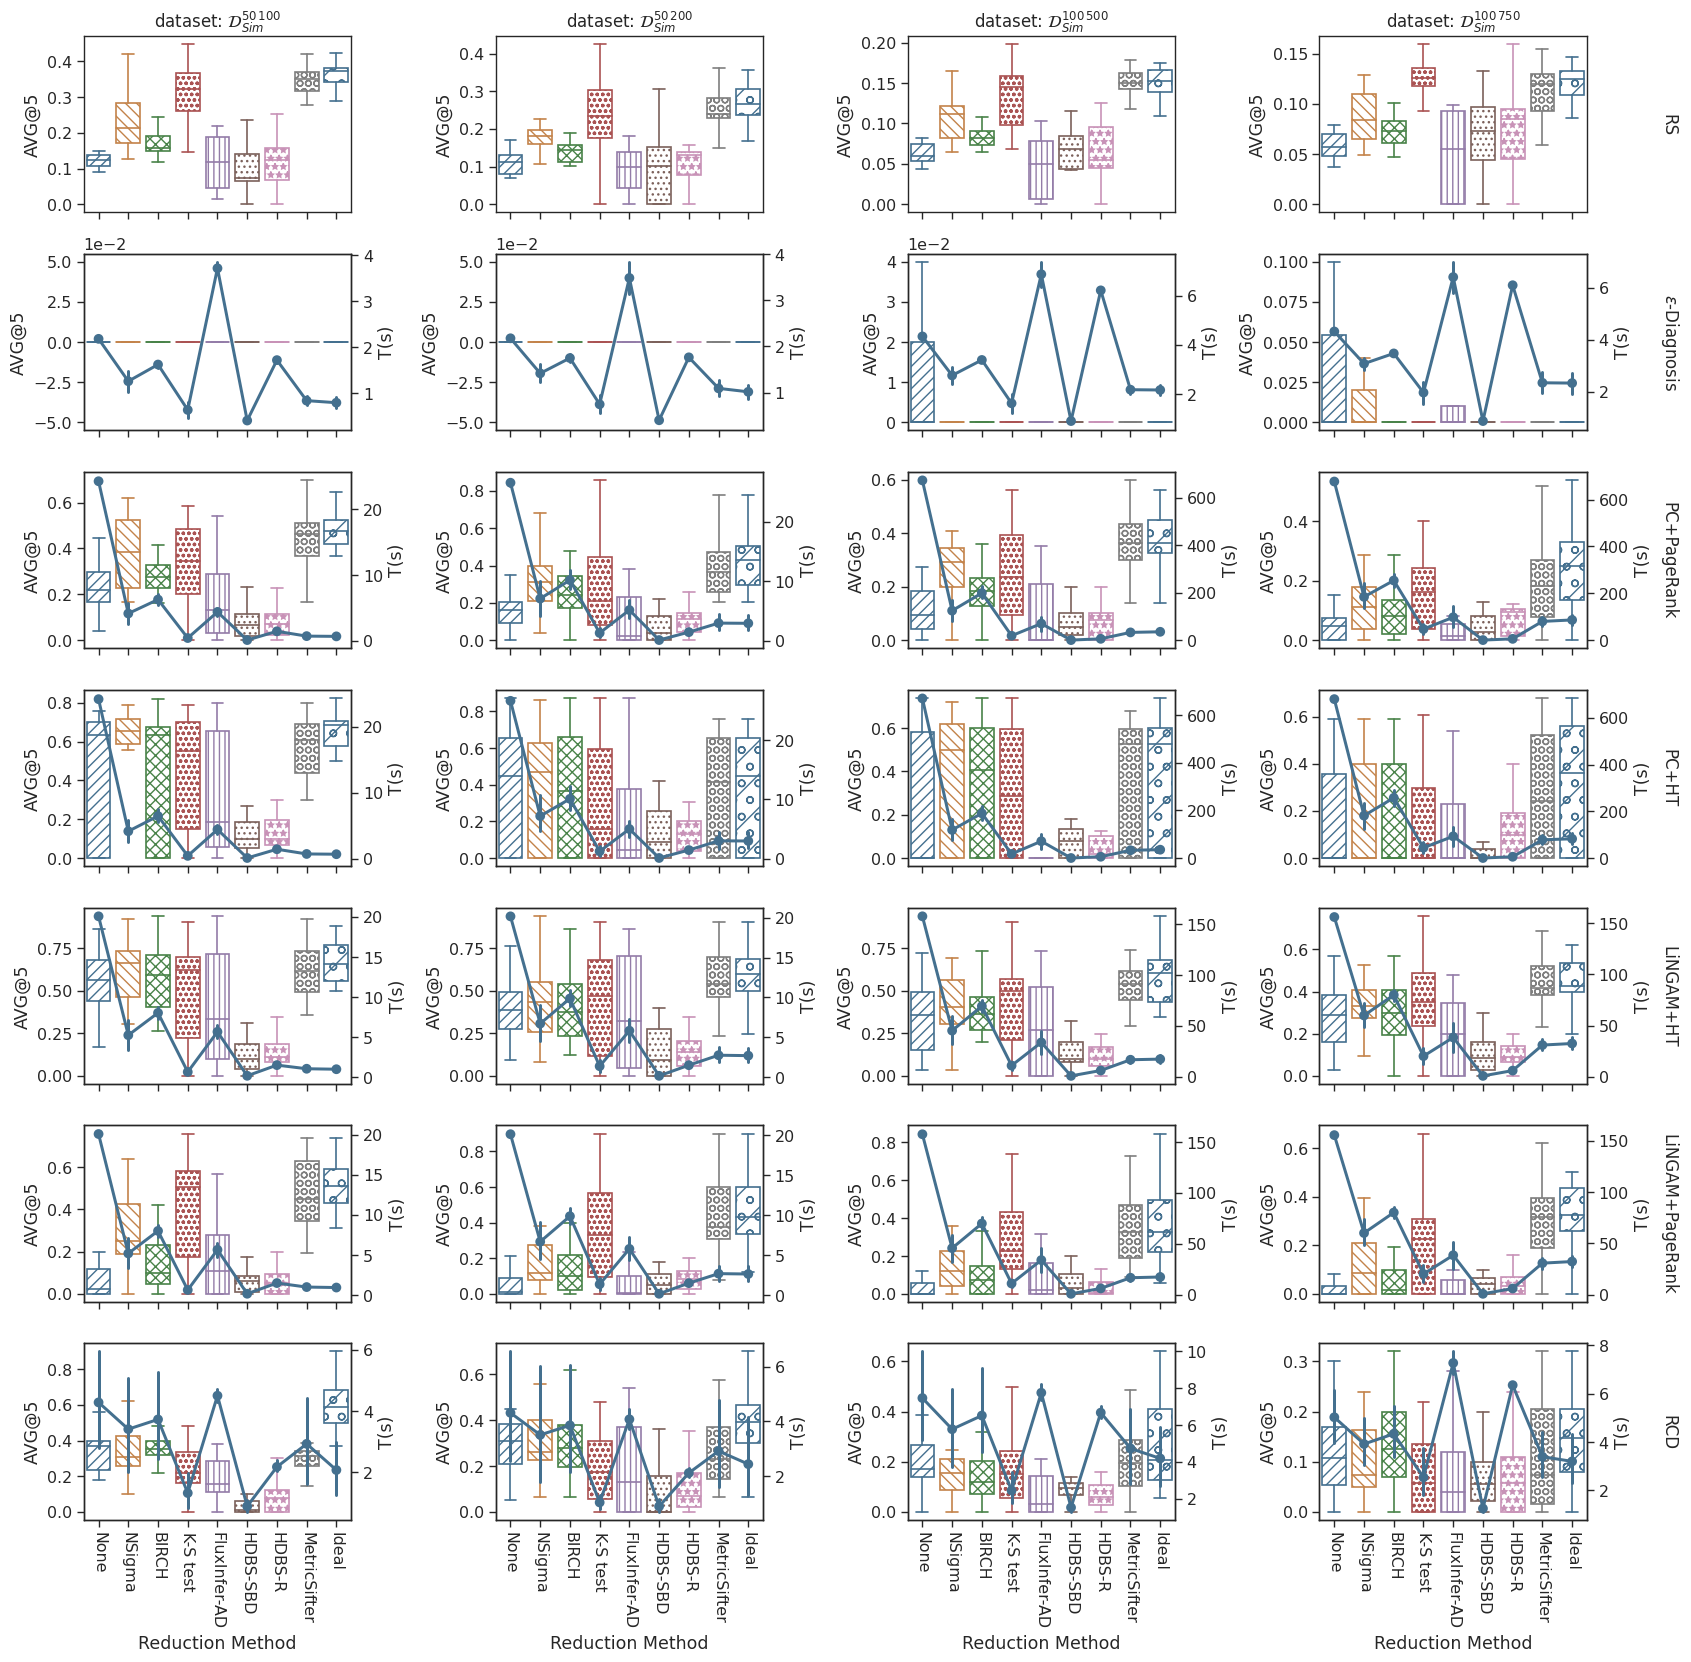

In [279]:
plot_grid(localization_joined_df.fillna(0).reset_index())


### Explaination of localization results

In [241]:
NORMAL_REDUCTION_METHODS = ["NSigma", "BIRCH", "K-S test", "FluxInfer-AD"]
REDUNDANT_REDUCTION_METHODS = ["HDBS-SBD", "HDBS-R"]


In [242]:
localization_joined_df["node/edge"] = localization_joined_df["num_node"].astype(str) + "/" + localization_joined_df["num_edge"].astype(str)
localization_joined_df["dataset"] = localization_joined_df.apply(lambda x: map_dataset(x), axis=1)


In [243]:
localization_joined_df.fillna(0).reset_index().query("reduction_method not in ['Ideal', 'MetricSifter']").groupby(["dataset", "localization_method", "reduction_method"]).mean(numeric_only=True).reset_index().groupby(["dataset", "localization_method"], as_index=True).apply(
    lambda x: (x[x["reduction_method"] != "None"]["avg@5"] - x[x["reduction_method"] == "None"]["avg@5"].iat[0]) * 100
).agg(["mean", "max", "min"])


mean    -1.412198
max     32.250000
min    -43.062500
Name: avg@5, dtype: float64

In [244]:
localization_joined_df.fillna(0).reset_index().query("reduction_method not in ['Ideal', 'MetricSifter']").groupby(["dataset", "localization_method", "reduction_method"]).mean(numeric_only=True).reset_index().groupby(["dataset", "localization_method"], as_index=True).apply(
    lambda x: (x[x["reduction_method"].isin(NORMAL_REDUCTION_METHODS)]["avg@5"] - x[x["reduction_method"] == "None"]["avg@5"].iat[0]) * 100
).agg(["mean", "max", "min"])


mean     2.783627
max     32.250000
min    -17.270833
Name: avg@5, dtype: float64

In [245]:
localization_joined_df.fillna(0).reset_index().query("reduction_method not in ['Ideal', 'MetricSifter']").groupby(["dataset", "localization_method", "reduction_method"]).mean(numeric_only=True).reset_index().groupby(["dataset", "localization_method"], as_index=True).apply(
    lambda x: (x[x["reduction_method"].isin(REDUNDANT_REDUCTION_METHODS)]["avg@5"] - x[x["reduction_method"] == "None"]["avg@5"].iat[0]) * 100
).agg(["mean", "max", "min"])


mean    -9.803849
max      3.875000
min    -43.062500
Name: avg@5, dtype: float64

In [246]:
t = localization_joined_df.fillna(0).reset_index().query("reduction_method != 'Ideal'").groupby(["dataset", "localization_method", "reduction_method"]).mean(numeric_only=True).reset_index().groupby(["dataset", "localization_method"], as_index=True).apply(
    lambda x: (x[x["reduction_method"] != "None"]["avg@5"] - x[x["reduction_method"] == "None"]["avg@5"].iat[0]) * 100
)
t.index[t.argmin()]


('$\\mathcal{D}_{Sim}^{50\\,100}$', 'LiNGAM+HT', 123)

In [247]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    display(
    localization_joined_df.reset_index().query("num_node == 50 & num_edge == 100 & localization_method == 'LiNGAM+HT'").groupby(["dataset", "localization_method", "reduction_method"], as_index=True).mean(numeric_only=True)
    )


index  \
dataset                       localization_method reduction_method             
$\mathcal{D}_{Sim}^{50\,100}$ LiNGAM+HT           BIRCH             410.6875   
                                                  FluxInfer-AD      411.6875   
                                                  HDBS-R            412.6875   
                                                  HDBS-SBD          413.6875   
                                                  Ideal             414.6875   
                                                  K-S test          415.6875   
                                                  MetricSifter      416.6875   
                                                  NSigma            417.6875   
                                                  None              418.6875   

                                                                    num_node  \
dataset                       localization_method reduction_method             
$\mathcal{D}_{Sim}^{50\,100}$ LiNGAM+HT           BIRCH                 50.0   
                                                  FluxInfer-AD          50.0   
                                                  HDBS-R                50.0   
                                                  HDBS-SBD              50.0   
                                                  Ideal                 50.0   
                                                  K-S test              50.0   
                                                  MetricSifter          50.0   
                                                  NSigma                50.0   
                                                  None                  50.0   

                                                                    num_edge  \
dataset                       localization_method reduction_method             
$\mathcal{D}_{Sim}^{50\,100}$ LiNGAM+HT           BIRCH                100.0   
                                                  FluxInfer-AD         100.0   
                                                  HDBS-R               100.0   
                                                  HDBS-SBD             100.0   
                                                  Ideal                100.0   
                                                  K-S test             100.0   
                                                  MetricSifter         100.0   
                                                  NSigma               100.0   
                                                  None                 100.0   

                                                                    anomaly_type  \
dataset                       localization_method reduction_method                 
$\mathcal{D}_{Sim}^{50\,100}$ LiNGAM+HT           BIRCH                      0.5   
                                                  FluxInfer-AD               0.5   
                                                  HDBS-R                     0.5   
                                                  HDBS-SBD                   0.5   
                                                  Ideal                      0.5   
                                                  K-S test                   0.5   
                                                  MetricSifter               0.5   
                                                  NSigma                     0.5   
                                                  None                       0.5   

                                                                        ac@2  \
dataset                       localization_method reduction_method             
$\mathcal{D}_{Sim}^{50\,100}$ LiNGAM+HT           BIRCH             0.516667   
                                                  FluxInfer-AD      0.376042   
                                                  HDBS-R            0.129167   
                                                  HDBS-SBD          0.114583   
                       

In [248]:
t = localization_joined_df.fillna(0).reset_index().query("reduction_method != 'Ideal'").groupby(["dataset", "localization_method", "reduction_method"]).mean(numeric_only=True).reset_index().groupby(["dataset", "localization_method"], as_index=True).apply(
    lambda x: (x[x["reduction_method"].isin(NORMAL_REDUCTION_METHODS)]["avg@5"] - x[x["reduction_method"] == "None"]["avg@5"].iat[0]) * 100
)
t.index[t.argmin()]


('$\\mathcal{D}_{Sim}^{50\\,200}$', 'PC+HT', 193)

In [249]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    display(
    localization_joined_df.reset_index().query("num_node == 50 & num_edge == 200 & localization_method == 'PC+HT'").groupby(["dataset", "localization_method", "reduction_method"], as_index=True).mean(numeric_only=True)
    )


index  \
dataset                       localization_method reduction_method              
$\mathcal{D}_{Sim}^{50\,200}$ PC+HT               BIRCH             1283.8125   
                                                  FluxInfer-AD      1284.8125   
                                                  HDBS-R            1285.8125   
                                                  HDBS-SBD          1286.8125   
                                                  Ideal             1287.8125   
                                                  K-S test          1288.8125   
                                                  MetricSifter      1289.8125   
                                                  NSigma            1290.8125   
                                                  None              1291.8125   

                                                                    num_node  \
dataset                       localization_method reduction_method             
$\mathcal{D}_{Sim}^{50\,200}$ PC+HT               BIRCH                 50.0   
                                                  FluxInfer-AD          50.0   
                                                  HDBS-R                50.0   
                                                  HDBS-SBD              50.0   
                                                  Ideal                 50.0   
                                                  K-S test              50.0   
                                                  MetricSifter          50.0   
                                                  NSigma                50.0   
                                                  None                  50.0   

                                                                    num_edge  \
dataset                       localization_method reduction_method             
$\mathcal{D}_{Sim}^{50\,200}$ PC+HT               BIRCH                200.0   
                                                  FluxInfer-AD         200.0   
                                                  HDBS-R               200.0   
                                                  HDBS-SBD             200.0   
                                                  Ideal                200.0   
                                                  K-S test             200.0   
                                                  MetricSifter         200.0   
                                                  NSigma               200.0   
                                                  None                 200.0   

                                                                    anomaly_type  \
dataset                       localization_method reduction_method                 
$\mathcal{D}_{Sim}^{50\,200}$ PC+HT               BIRCH                      0.5   
                                                  FluxInfer-AD               0.5   
                                                  HDBS-R                     0.5   
                                                  HDBS-SBD                   0.5   
                                                  Ideal                      0.5   
                                                  K-S test                   0.5   
                                                  MetricSifter               0.5   
                                                  NSigma                     0.5   
                                                  None                       0.5   

                                                                        ac@2  \
dataset                       localization_method reduction_method             
$\mathcal{D}_{Sim}^{50\,200}$ PC+HT               BIRCH             0.592593   
                                                  FluxInfer-AD      0.240972   
                                                  HDBS-R            0.132667   
                                                  HDBS-SBD          0.126979   
             

In [284]:
localization_joined_df.fillna(0).reset_index().groupby(["dataset", "localization_method", "reduction_method"]).mean(numeric_only=True).reset_index().groupby(["dataset", "localization_method"], as_index=True).apply(
    lambda x: (x[x["reduction_method"] == "Ideal"]["avg@5"].iat[0] - x[x["reduction_method"] != "Ideal"]["avg@5"].max()) * 100
).agg(["mean", "max", "min"])


mean     3.243607
max     23.645833
min     -2.750000
dtype: float64

In [299]:
localization_joined_df.fillna(0).reset_index().groupby(["dataset", "localization_method", "reduction_method"]).mean(numeric_only=True).reset_index().groupby(["dataset", "localization_method"], as_index=True).apply(
    lambda x: (x[x["reduction_method"] == "Ideal"]["avg@5"].iat[0] - x[x["reduction_method"] == "MetricSifter"]["avg@5"].iat[0]) * 100
).agg(["mean", "max", "min"])


mean     4.291027
max     28.979167
min      0.000000
dtype: float64

In [317]:
# MetricSifterのIdealに対する限界到達率
localization_joined_df.fillna(0).reset_index().groupby(["dataset", "localization_method", "reduction_method"]).mean(numeric_only=True).reset_index().groupby(["dataset", "localization_method"], as_index=True).apply(
    lambda x: (x[x["reduction_method"] == "MetricSifter"]["avg@5"].iat[0] / x[x["reduction_method"] == "Ideal"]["avg@5"].iat[0]) * 100
).agg(["mean", "max", "min"])


/tmp/ipykernel_1518081/1797411879.py:3: RuntimeWarning: invalid value encountered in double_scalars
  lambda x: (x[x["reduction_method"] == "MetricSifter"]["avg@5"].iat[0] / x[x["reduction_method"] == "Ideal"]["avg@5"].iat[0]) * 100


mean     83.156801
max     100.000000
min       0.000000
dtype: float64

In [312]:
#ベースライン+MetricSifterのIdealに対する限界到達率
localization_joined_df.fillna(0).reset_index().query("localization_method != 'EpsilonDiagnosis'").groupby(["dataset", "localization_method", "reduction_method"]).mean(numeric_only=True).reset_index().groupby(["dataset", "localization_method"], as_index=True).apply(
    lambda x: (x[x["reduction_method"]!= "Ideal"]["avg@5"].max() / x[x["reduction_method"] == "Ideal"]["avg@5"].iat[0]) * 100
).agg(["mean", "max", "min"])


mean     90.333944
max     102.738195
min      59.565372
dtype: float64

In [250]:
localization_joined_df.fillna(0).reset_index().query("reduction_method != 'Ideal'").groupby(["dataset", "localization_method", "reduction_method"]).mean(numeric_only=True).reset_index().groupby(["dataset", "localization_method"], as_index=True).apply(
    lambda x: (x[x["reduction_method"] == "MetricSifter"]["avg@5"].iat[0] - x[x["reduction_method"] != "MetricSifter"]["avg@5"].max()) * 100
).agg(["mean", "max", "min"])


mean     3.072888
max     12.054167
min     -5.333333
dtype: float64

In [298]:
def _get_best_reduction(x: pd.DataFrame) -> pd.Series:
    # method = x[x["avg@5"] == x["avg@5"].max()]["reduction_method"].iat[0]
    best_baseline = x.iloc[x[x["reduction_method"] != "MetricSifter"]["avg@5"].argmax(), :]
    return pd.Series({"reduction_method": best_baseline["reduction_method"], "diff": (x[x["reduction_method"] == "MetricSifter"]["avg@5"].iat[0] - best_baseline["avg@5"]) * 100})

localization_joined_df.fillna(0).reset_index().query("reduction_method != 'Ideal'").groupby(["dataset", "localization_method", "reduction_method"]).mean(numeric_only=True).reset_index().groupby(["dataset", "localization_method"], as_index=True).apply(
    lambda x: _get_best_reduction(x)
).query("diff < 0")#.groupby("reduction_method").agg(["mean", "max", "min"], numeric_only=True)


reduction_method      diff
dataset                        localization_method                           
$\mathcal{D}_{Sim}^{100\,500}$ EpsilonDiagnosis              NSigma -1.989583
$\mathcal{D}_{Sim}^{100\,750}$ EpsilonDiagnosis              NSigma -1.291667
                               RCD                            BIRCH -3.804167
                               RS                          K-S test -0.695471
$\mathcal{D}_{Sim}^{50\,100}$  EpsilonDiagnosis               BIRCH -0.729167
                               RCD                            BIRCH -5.333333
$\mathcal{D}_{Sim}^{50\,200}$  EpsilonDiagnosis               BIRCH -0.833333
                               PC+HT                         NSigma -2.843750

In [ ]:
localization_joined_df.


In [254]:
localization_joined_df.fillna(0).reset_index().query("reduction_method != 'Ideal'").groupby(["dataset", "localization_method", "reduction_method"]).mean(numeric_only=True).reset_index().groupby(["dataset", "localization_method"], as_index=True).apply(
    # lambda x: (x[x["reduction_method"] != "MetricSifter"]["elapsed_time_sum"].min() / x[x["reduction_method"] == "MetricSifter"]["elapsed_time_sum"].iat[0]) * 100
    lambda x: x.iloc[x[x["reduction_method"] != "MetricSifter"]["avg@5"].argmax(), :]["elapsed_time_sum"] / x[x["reduction_method"] == "MetricSifter"]["elapsed_time_sum"]
).agg(["mean", "max", "min"])


mean    1.072180
max     3.288826
min     0.424609
Name: elapsed_time_sum, dtype: float64

In [273]:
localization_joined_df.fillna(0).reset_index().query("reduction_method != 'Ideal'").groupby(["dataset", "localization_method", "reduction_method"]).mean(numeric_only=True).reset_index().groupby(["dataset", "localization_method"], as_index=True).apply(
    # lambda x: x[x["reduction_method"].isin(NORMAL_REDUCTION_METHODS)]["elapsed_time_sum"].min() / x[x["reduction_method"] == "MetricSifter"]["elapsed_time_sum"].iat[0]
    lambda x: x.iloc[x[x["reduction_method"].isin(NORMAL_REDUCTION_METHODS)]["avg@5"].argmax(), :]["elapsed_time_sum"] / x[x["reduction_method"] == "MetricSifter"]["elapsed_time_sum"].iat[0]
).groupby(["dataset"]).agg(["mean", "max", "min"])


mean       max       min
dataset                                                     
$\mathcal{D}_{Sim}^{100\,500}$  0.267872  0.413581  0.015244
$\mathcal{D}_{Sim}^{100\,750}$  0.798563  3.288826  0.071238
$\mathcal{D}_{Sim}^{50\,100}$   0.915506  1.932317  0.167846
$\mathcal{D}_{Sim}^{50\,200}$   0.454892  1.598692  0.043094

In [267]:
localization_joined_df.fillna(0).reset_index().query("reduction_method != 'Ideal'").groupby(["dataset", "localization_method", "reduction_method"]).mean(numeric_only=True).reset_index().groupby(["dataset", "localization_method"], as_index=True).apply(
    lambda x: x[x["reduction_method"].isin(REDUNDANT_REDUCTION_METHODS)]["elapsed_time_sum"].min() / x[x["reduction_method"] == "MetricSifter"]["elapsed_time_sum"].iat[0]
).agg(["mean", "max", "min"])


mean    0.157331
max     0.486671
min     0.006287
dtype: float64

In [255]:
localization_joined_df.fillna(0).reset_index().query("reduction_method != 'Ideal'").groupby(["dataset", "localization_method", "reduction_method"]).mean(numeric_only=True).reset_index().groupby(["dataset", "localization_method"], as_index=True).apply(
    lambda x: (x[x["reduction_method"] == "MetricSifter"]["avg@5"].iat[0] - x[x["reduction_method"].isin(NORMAL_REDUCTION_METHODS)]["avg@5"].max()) * 100
).agg(["mean", "max", "min"])


mean     3.213513
max     12.054167
min     -5.333333
dtype: float64

In [256]:
localization_joined_df.fillna(0).reset_index().query("reduction_method != 'Ideal'").groupby(["dataset", "localization_method", "reduction_method"]).mean(numeric_only=True).reset_index().groupby(["dataset", "localization_method"], as_index=True).apply(
    lambda x: (x[x["reduction_method"] == "MetricSifter"]["avg@5"].iat[0] - x[x["reduction_method"].isin(REDUNDANT_REDUCTION_METHODS)]["avg@5"].max()) * 100
).agg(["mean", "max", "min"])


mean    21.203922
max     47.187500
min      0.000000
dtype: float64

In [ ]:
localization_joined_df.fillna(0).reset_index().query("reduction_method != 'Ideal'").groupby(["dataset", "localization_method", "reduction_method"]).mean(numeric_only=True).reset_index().groupby(["dataset", "localization_method"], as_index=True).apply(
    lambda x: (x[x["reduction_method"] == "MetricSifter"]["avg@5"].iat[0] - x[x["reduction_method"] == "None"]["avg@5"].iat[0]) * 100
).agg(["mean", "max", "min"])


mean    12.591339
max     39.645833
min     -3.020833
dtype: float64

In [ ]:
localization_joined_df.fillna(0).reset_index().query("reduction_method != 'Ideal'").groupby(["dataset", "localization_method", "reduction_method"]).mean(numeric_only=True).reset_index().groupby(["dataset", "localization_method"], as_index=True).apply(
    lambda x: (x[x["reduction_method"] == "MetricSifter"]["avg@5"].iat[0] - x[x["reduction_method"] == "None"]["avg@5"].iat[0]) * 100
).sort_values(ascending=True)


dataset                         localization_method
$\mathcal{D}_{Sim}^{50\,200}$   PC+HT                  -3.020833
$\mathcal{D}_{Sim}^{100\,500}$  EpsilonDiagnosis       -2.750000
$\mathcal{D}_{Sim}^{100\,750}$  EpsilonDiagnosis       -2.395833
                                RCD                    -1.312500
$\mathcal{D}_{Sim}^{50\,100}$   RCD                    -1.270833
$\mathcal{D}_{Sim}^{50\,200}$   EpsilonDiagnosis       -0.833333
$\mathcal{D}_{Sim}^{50\,100}$   EpsilonDiagnosis       -0.729167
$\mathcal{D}_{Sim}^{50\,200}$   RCD                     1.883333
$\mathcal{D}_{Sim}^{100\,500}$  RCD                     3.150000
$\mathcal{D}_{Sim}^{100\,750}$  RS                      5.517154
$\mathcal{D}_{Sim}^{50\,100}$   LiNGAM+HT               6.812500
                                PC+HT                   7.276042
$\mathcal{D}_{Sim}^{100\,500}$  RS                      9.112457
$\mathcal{D}_{Sim}^{100\,750}$  PC+HT                  11.806944
$\mathcal{D}_{Sim}^{100\,500}$  PC+HT 

## Correlation Analysis

In [257]:
from itertools import product

loc_scores = ["ac@2", "ac@5", "avg@10"]
tsdr_all_scores = ["bacc", "recall", "specificity"]

def correlation_fn(group: pd.Series, tsdr_scores: list[str] = ["bacc"], loc_score: str = "avg@5", method="pearson"):
    # display(group[loc_scores], group[tsdr_scores])
    # print("print", group[tsdr_scores], group[loc_scores[-1]])
    z = group[tsdr_scores].corrwith(group[loc_score], method=method, axis=0)
    return z

def correlation_pval_fn(group: pd.Series, tsdr_scores: list[str] = ["bacc"], loc_score: str = "avg@5"):
    res = {}
    for tsdr_score, loc_score in product(tsdr_scores, loc_scores):
        r = scipy.stats.pearsonr(group[tsdr_score], group[loc_score], alternative="greater")
        res[tsdr_score] = r.pvalue
    return pd.Series(res)


def coeff_determination_fn(group: pd.Series, tsdr_scores: list[str] = ["bacc"], loc_scores: str = "avg@5"):
    res = {}
    for tsdr_score, loc_score in product(tsdr_scores, loc_scores):
        r = scipy.stats.pearsonr(group[tsdr_score], group[loc_score], alternative="greater")
        res[(tsdr_score, loc_score)] = r.statistic **2
    return pd.Series(res)


corr_localization_df = localization_joined_df.fillna(0).reset_index()
corr_localization_df["node/edge"] = corr_localization_df["num_node"].astype(str) + "/" + corr_localization_df["num_edge"].astype(str)
corr_localization_df["dataset"] = corr_localization_df.apply(lambda x: map_dataset(x), axis=1)
corr_localization_df.loc[corr_localization_df["localization_method"] == "EpsilonDiagnosis", "localization_method"] = r"$\epsilon$-Diagnosis"

for loc_score in loc_scores[2:3]:
    for method in ["pearson", "spearman", "kendall"][0:1]:
        display(
            (loc_score, method),
            corr_localization_df[tsdr_all_scores].corrwith(corr_localization_df[loc_score], method=method, axis=0),
            corr_localization_df.groupby(['dataset'], as_index=True).apply(
                correlation_fn, tsdr_scores=tsdr_all_scores, loc_score=loc_score, method=method,
            ).dropna(),
            corr_localization_df.groupby(['localization_method'], as_index=True).apply(
                correlation_fn, tsdr_scores=tsdr_all_scores, loc_score=loc_score, method=method,
            ).dropna(),
            # corr_localization_df.groupby(['reduction_method'], as_index=True).apply(
            #     correlation_fn, tsdr_scores=tsdr_all_scores, loc_score=loc_score, method=method,
            # ).dropna(),
            corr_localization_df.groupby(['dataset', 'localization_method'], as_index=True).apply(
                correlation_fn, tsdr_scores=tsdr_all_scores, loc_score=loc_score, method=method,
            ).dropna(),
        )


('avg@10', 'pearson')

bacc           0.487553
recall         0.488294
specificity    0.072088
dtype: float64

bacc    recall  specificity
dataset                                                        
$\mathcal{D}_{Sim}^{100\,500}$  0.479860  0.431685     0.125335
$\mathcal{D}_{Sim}^{100\,750}$  0.420774  0.344813     0.149162
$\mathcal{D}_{Sim}^{50\,100}$   0.562418  0.614810     0.033306
$\mathcal{D}_{Sim}^{50\,200}$   0.537310  0.570701     0.046233

bacc    recall  specificity
localization_method                                  
$\epsilon$-Diagnosis -0.013604  0.130871    -0.165094
LiNGAM+HT             0.675222  0.788246    -0.035723
LiNGAM+PageRank       0.765877  0.504049     0.416382
PC+HT                 0.411448  0.501163    -0.045055
PC+PageRank           0.687492  0.626560     0.169816
RCD                   0.485727  0.649857    -0.120469
RS                    0.703933  0.579362     0.247877

bacc    recall  \
dataset                        localization_method                        
$\mathcal{D}_{Sim}^{100\,500}$ $\epsilon$-Diagnosis -0.101210  0.187354   
                               LiNGAM+HT             0.736986  0.773876   
                               LiNGAM+PageRank       0.741946  0.437843   
                               PC+HT                 0.426310  0.469632   
                               PC+PageRank           0.798390  0.618911   
                               RCD                   0.491306  0.600706   
                               RS                    0.864311  0.561240   
$\mathcal{D}_{Sim}^{100\,750}$ $\epsilon$-Diagnosis  0.000604  0.177518   
                               LiNGAM+HT             0.709622  0.708536   
                               LiNGAM+PageRank       0.730754  0.390915   
                               PC+HT                 0.359811  0.332067   
                               PC+PageRank           0.576481  0.384179   
                               RCD                   0.371465  0.507492   
                               RS                    0.672361  0.392043   
$\mathcal{D}_{Sim}^{50\,100}$  LiNGAM+HT             0.676411  0.921837   
                               LiNGAM+PageRank       0.873367  0.626832   
                               PC+HT                 0.529187  0.678365   
                               PC+PageRank           0.789716  0.826663   
                               RCD                   0.645183  0.878400   
                               RS                    0.873517  0.746126   
$\mathcal{D}_{Sim}^{50\,200}$  $\epsilon$-Diagnosis  0.117906  0.060091   
                               LiNGAM+HT             0.702679  0.831228   
                               LiNGAM+PageRank       0.791956  0.567784   
                               PC+HT                 0.381457  0.543525   
                               PC+PageRank           0.750053  0.731868   
                               RCD                   0.574609  0.767369   
                               RS                    0.834736  0.790439   

                                                     specificity  
dataset                        localization_method                
$\mathcal{D}_{Sim}^{100\,500}$ $\epsilon$-Diagnosis    -0.349787  
                               LiNGAM+HT                0.058332  
                               LiNGAM+PageRank          0.465986  
                               PC+HT                    0.010636  
                               PC+PageRank              0.325089  
                               RCD                     -0.060157  
                               RS                       0.483015  
$\mathcal{D}_{Sim}^{100\,750}$ $\epsilon$-Diagnosis    -0.208629  
                               LiNGAM+HT                0.092330  
                               LiNGAM+PageRank          0.506073  
                               PC+HT                    0.079837  
                               PC+PageRank              0.307270  
                               RCD                     -0.109922  
                               RS                       0.429064  
$\mathcal{D}_{Sim}^{50\,100}$  LiNGAM+HT               -0.168169  
                               LiNGAM+PageRank          0.414757  
                               PC+HT                   -0.081970  
                               PC+PageRank              0.083583  
                               RCD                     -0.164166  
                               RS                       0.279542  
$\mathcal{D}_{Sim}^{50\,200}$  $\epsilon$-Diagnosis     0.086679  
                               LiNGAM+HT               -0.044884  
                               LiNGAM+PageRank          0.376825  
                               PC+HT                   -0.130474  
                               PC+PageRank              0.132064  
                               RCD                     -0.137909  
     

In [258]:
corr_localization_df.groupby(['localization_method'], as_index=True).apply(
    coeff_determination_fn, tsdr_scores=["bacc", "recall", "specificity"], loc_scores=["avg@5", "avg@10", "elapsed_time_loc"],
).dropna()


bacc                               recall            \
                         avg@5    avg@10 elapsed_time_loc     avg@5    avg@10   
localization_method                                                             
$\epsilon$-Diagnosis  0.000073  0.000185         0.004796  0.025812  0.017127   
LiNGAM+HT             0.415211  0.455925         0.009828  0.481059  0.621331   
LiNGAM+PageRank       0.498213  0.586568         0.009842  0.173081  0.254065   
PC+HT                 0.137771  0.169289         0.021297  0.187675  0.251165   
PC+PageRank           0.401912  0.472645         0.021294  0.254379  0.392578   
RCD                   0.148263  0.235930         0.006408  0.222260  0.422314   
RS                    0.369059  0.495522         0.017509  0.132748  0.335660   

                                      specificity                             
                     elapsed_time_loc       avg@5    avg@10 elapsed_time_loc  
localization_method                                                           
$\epsilon$-Diagnosis         0.372674    0.036861  0.027256         0.355794  
LiNGAM+HT                    0.164076    0.001198  0.001276         0.365841  
LiNGAM+PageRank              0.164342    0.194101  0.173374         0.366414  
PC+HT                        0.103047    0.000342  0.002030         0.323611  
PC+PageRank                  0.105047    0.058855  0.028837         0.326636  
RCD                          0.144323    0.001978  0.014513         0.114401  
RS                           0.124850    0.138936  0.061443         0.345508

In [259]:
corr_localization_df.groupby(['dataset', 'localization_method'], as_index=True).apply(
    coeff_determination_fn, tsdr_scores=["bacc", "recall", "specificity"], loc_scores=["avg@5", "avg@10", "elapsed_time_sum"],
).dropna()


/home/ubuntu/src/github.com/ai4sre/meltria-analyzer/.venv/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


bacc                \
                                                        avg@5        avg@10   
dataset                        localization_method                            
$\mathcal{D}_{Sim}^{100\,500}$ $\epsilon$-Diagnosis  0.001811  1.024352e-02   
                               LiNGAM+HT             0.492439  5.431488e-01   
                               LiNGAM+PageRank       0.478744  5.504842e-01   
                               PC+HT                 0.170014  1.817406e-01   
                               PC+PageRank           0.570407  6.374259e-01   
                               RCD                   0.146605  2.413812e-01   
                               RS                    0.698181  7.470337e-01   
$\mathcal{D}_{Sim}^{100\,750}$ $\epsilon$-Diagnosis  0.001503  3.651375e-07   
                               LiNGAM+HT             0.473580  5.035628e-01   
                               LiNGAM+PageRank       0.475107  5.340009e-01   
                               PC+HT                 0.123392  1.294637e-01   
                               PC+PageRank           0.269460  3.323304e-01   
                               RCD                   0.054394  1.379866e-01   
                               RS                    0.380050  4.520694e-01   
$\mathcal{D}_{Sim}^{50\,100}$  LiNGAM+HT             0.440665  4.575315e-01   
                               LiNGAM+PageRank       0.688254  7.627692e-01   
                               PC+HT                 0.245211  2.800384e-01   
                               PC+PageRank           0.538640  6.236511e-01   
                               RCD                   0.325489  4.162613e-01   
                               RS                    0.744293  7.630324e-01   
$\mathcal{D}_{Sim}^{50\,200}$  $\epsilon$-Diagnosis  0.000065  1.390191e-02   
                               LiNGAM+HT             0.415035  4.937576e-01   
                               LiNGAM+PageRank       0.478288  6.271947e-01   
                               PC+HT                 0.089342  1.455097e-01   
                               PC+PageRank           0.471698  5.625789e-01   
                               RCD                   0.218098  3.301750e-01   
                               RS                    0.525686  6.967849e-01   

                                                                      \
                                                    elapsed_time_sum   
dataset                        localization_method                     
$\mathcal{D}_{Sim}^{100\,500}$ $\epsilon$-Diagnosis         0.192964   
                               LiNGAM+HT                    0.053180   
                               LiNGAM+PageRank              0.052960   
                               PC+HT                        0.078752   
                               PC+PageRank                  0.079947   
                               RCD                          0.028966   
                               RS                           0.072519   
$\mathcal{D}_{Sim}^{100\,750}$ $\epsilon$-Diagnosis         0.164479   
                               LiNGAM+HT                    0.006723   
                               LiNGAM+PageRank              0.006705   
                               PC+HT                        0.031623   
                               PC+PageRank                  0.030039   
                               RCD                          0.087653   
                               RS                           0.022631   
$\mathcal{D}_{Sim}^{50\,100}$  LiNGAM+HT                    0.146305   
                               LiNGAM+PageRank              0.147836   
                               PC+HT                        0.150135   
                               PC+PageRank                  0.150254   
                               RCD                          0.017568   
                               RS                           0.147770   
$\mathcal{D}_{Sim}^{50\,200}$ 

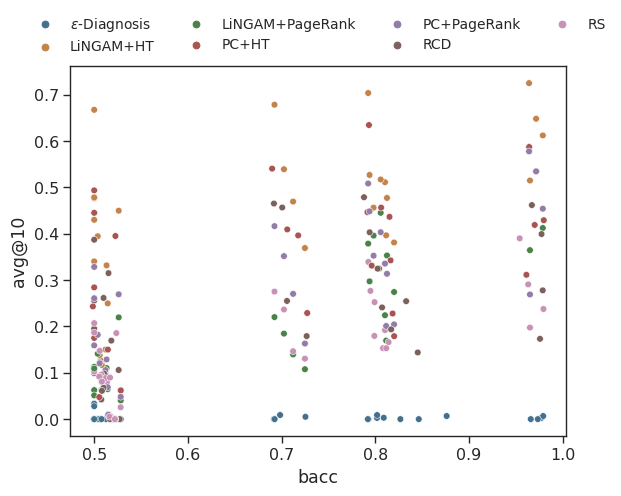

In [ ]:
g = sns.scatterplot(data=corr_localization_df.groupby(["dataset", "localization_method", "reduction_method"]).mean(numeric_only=True), x="bacc", y="avg@10", hue="localization_method")
sns.move_legend(
    g, "lower center",
    bbox_to_anchor=(.5, 1), ncol=4, title="", frameon=False, fontsize=10, title_fontsize=12
)
# g.move_legend("lower center", bbox_to_anchor=(.5, 1), ncol=3, title="Localization Method", frameon=False)


In [260]:
tex = corr_localization_df.groupby(['localization_method'], as_index=True).apply(
    coeff_determination_fn, tsdr_scores=["bacc", "recall", "specificity"], loc_scores=["avg@5", "avg@10"],
).dropna().style.format(precision=3).to_latex(hrules=True)
print(tex)
# ["RS", r"$\epsilon$-Diagnosis", "PC+PageRank", "PC+HT", "LiNGAM+PageRank", "LiNGAM+HT"]


\begin{tabular}{lrrrrrr}
\toprule
 & \multicolumn{2}{r}{bacc} & \multicolumn{2}{r}{recall} & \multicolumn{2}{r}{specificity} \\
 & avg@5 & avg@10 & avg@5 & avg@10 & avg@5 & avg@10 \\
localization_method &  &  &  &  &  &  \\
\midrule
$\epsilon$-Diagnosis & 0.000 & 0.000 & 0.026 & 0.017 & 0.037 & 0.027 \\
LiNGAM+HT & 0.415 & 0.456 & 0.481 & 0.621 & 0.001 & 0.001 \\
LiNGAM+PageRank & 0.498 & 0.587 & 0.173 & 0.254 & 0.194 & 0.173 \\
PC+HT & 0.138 & 0.169 & 0.188 & 0.251 & 0.000 & 0.002 \\
PC+PageRank & 0.402 & 0.473 & 0.254 & 0.393 & 0.059 & 0.029 \\
RCD & 0.148 & 0.236 & 0.222 & 0.422 & 0.002 & 0.015 \\
RS & 0.369 & 0.496 & 0.133 & 0.336 & 0.139 & 0.061 \\
\bottomrule
\end{tabular}



## Testing

In [ ]:
# Investigate why MetricSifter is slow
from simulation.synthetic_data import load_data

normal_data_df, abnormal_data_df, true_root_causes, adjacency_df, anomaly_propagated_nodes = load_data(
    anomaly_type=1,
    data_params=dict(
        num_node=100,
        num_edge=750,
        num_normal_samples=160,
        num_abnormal_samples=20,
    ),
    func_type="identity",
    noise_type="normal",
    weight_generator="uniform",
    trial_no=2,
)


In [ ]:
from tsdr.multireducer import change_point_clustering_with_kde

concated_data_df = pd.concat([normal_data_df, abnormal_data_df], axis=0, ignore_index=True)
cinfo, remove_metrics = change_point_clustering_with_kde(
    concated_data_df,
    search_method="pelt",
    cost_model="l2",
    penalty="bic",
    n_bkps=1,
    kde_bandwidth=1.0,
    kde_bandwidth_adjust=1.0,
    multi_change_points=True,
    representative_method=False,
    segment_selection_method="weighted_max",
    n_jobs=1,
)


In [ ]:
len(remove_metrics)


90